# Constraining subglacial processes from surface velocity observations using surrogate-based Bayesian inference
## Part 1 - Training an ensemble of neural networks

In this notebook, we will illustrate the process of using Bayesian Bootstrap Aggregation (BayesBag) to train an ensemble of neural networks.  In this case, each ensemble member is one possible surrogate for PISM, mapping from a vector of 8 parameters to a velocity field.  We begin by importing both the parameters and the associated velocity fields computed by the physics model, which will act as training data for the surrogate.

In [14]:
import xarray as xr

thin = 5

o_file = "../data/validation/greenland_vel_mosaic250_v1_g1800m.nc"
o_xr = xr.open_dataset(o_file)
grid_resolution = np.abs(np.diff(o_xr.variables["x"][0:2]))
o_speed = o_xr.variables["velsurf_mag"].values[::thin,::thin]
o_speed_sigma = o_xr.variables["velsurf_mag_error"].values[::thin,::thin]

o_ny, o_nx = o_speed.shape
o_xr.close()

ny,nx = o_speed.shape

In [10]:
import pickle
import numpy as np
import re
import xarray as xr

thin = 5

o_file = "../data/speeds_v2/greenland_vel_mosaic250_v1_g1800m.nc"
o_xr = xr.open_dataset(o_file)

o_speed = o_xr.variables["velsurf_mag"].values[::thin,::thin]
o_speed_sigma = o_xr.variables["velsurf_mag_error"].values[::thin,::thin]

o_ny, o_nx = o_speed.shape
o_xr.close()

o_speeds = np.nan_to_num(o_speed, 0).reshape(-1, 1)
o_log_speeds = np.log10(o_speeds)
o_log_speeds[np.isneginf(o_log_speeds)] = 0

o_speeds_sigma = np.nan_to_num(o_speed_sigma, 0).reshape(-1, 1)

from glob import glob
s_files = glob("../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_*_0_50.nc")
nt = len(s_files)

# open first file to get the dimensions
vxr0 = xr.open_dataset(s_files[0])
speed = vxr0.variables["velsurf_mag"].values[:,::thin,::thin]
_, ny, nx = speed.shape
vxr0.close()

m_speeds = np.zeros((nt, ny * nx))

# Go through all files and don't forget to extract the experiment id
ids = []
for k, s_file in enumerate(s_files):
    print(f"Reading {s_file}")
    vxr = xr.open_dataset(s_file)
    ids.append(re.search("id_(.+?)_0", s_file).group(1))
    m_speeds[k, ::] = vxr.variables["velsurf_mag"].values[:,::thin,::thin].flatten()
    vxr.close()

# For comparison, we run the analysis for both u and log10(u)
m_speeds_mean = np.nanmean(m_speeds, axis=0)
m_speeds_anom = m_speeds - m_speeds_mean
m_speeds_anom = np.nan_to_num(m_speeds_anom, 0)

m_log_speeds = np.log10(np.nan_to_num(m_speeds, 0))
m_log_speeds[np.isneginf(m_log_speeds)] = 0
m_log_speeds_mean = np.nanmean(m_log_speeds, axis=0)
m_log_speeds_anom =  m_log_speeds - m_log_speeds_mean
m_log_speeds_anom[np.isneginf(m_log_speeds_anom)] = 0
m_log_speeds_anom = np.nan_to_num(m_log_speeds_anom, 0)

# Load velocity fields
#F_lin = pickle.load(open('data/F_prior.p','rb'))

# Load model parameters 
#X = pickle.load(open('data/X_prior.p','rb'))000

/home/brinkerhoff/miniconda3/envs/working/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_581_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_626_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_127_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_692_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_519_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_105_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_505_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_609_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_3_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_5_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_307_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_890_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_573_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_762_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4

Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_129_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_859_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_495_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_369_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_570_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_86_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_399_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_950_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_567_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_63_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_844_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_217_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_683_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_206_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_

Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_660_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_718_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_657_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_10_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_816_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_133_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_480_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_580_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_472_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_168_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_715_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_876_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_131_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_705_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m

Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_698_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_966_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_768_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_669_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_196_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_773_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_144_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_394_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_557_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_851_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_899_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_425_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_619_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_262_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800

Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_531_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_397_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_286_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_145_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_113_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_122_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_109_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_306_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_170_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_797_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_902_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_720_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_965_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_782_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800

Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_826_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_751_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_974_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_465_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_756_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_17_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_699_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_726_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_231_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_458_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_175_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_781_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_385_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_735_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m

Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_245_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_559_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_769_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_321_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_694_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_978_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_418_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_448_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_743_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_971_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_854_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_104_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_596_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_117_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800

Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_777_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_449_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_964_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_886_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_349_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_460_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_803_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_390_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_139_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_845_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_688_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_211_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_146_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_153_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800

Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_644_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_684_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_934_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_790_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_372_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_830_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_514_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_169_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_913_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_562_0_50.nc


/home/brinkerhoff/miniconda3/envs/working/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log10


In [11]:
import pandas as pd
response_file = "log_speeds.csv"
df = pd.DataFrame(data=m_log_speeds, index=ids)
print(df.head())
df.to_csv(response_file, index_label="id")

     0      1      2      3      4      5      6      7      8      9      \
581    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
626    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
127    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
692    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
519    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

     ...  53494  53495  53496  53497  53498  53499  53500  53501  53502  53503  
581  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
626  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
127  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
692  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
519  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 53504 columns]


In [1]:
from pismemulator.utils import prepare_data
import pandas as pd
response_file = "log_speeds.csv.gz"
samples_file = "../data/samples/velocity_calibration_samples_100.csv"
samples, response = prepare_data(samples_file, response_file)


Preparing sample ../data/samples/velocity_calibration_samples_100.csv and response log_speeds.csv.gz
The following simulation ids are missing:
   [337, 595, 539, 542]


In [44]:
F = response.values
X = samples.values

We will use pytorch to construct and train the neural networks.  To this end, we will move the physical model's parameters and (log-)speed fields to pytorch, and use the GPU if it's available.

In [45]:
F.min()

0.0

In [46]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

X = torch.from_numpy(X)
F = torch.from_numpy(F)
F[F<0] = 0

X = X.to(torch.float32)
F = F.to(torch.float32)

X = X.to(device)
F = F.to(device)

X_m = X.mean(axis=0)
X_s = X.std(axis=0)

X = (X-X_m)/X_s

n_parameters = X.shape[1]
n_samples, n_grid_points = F.shape

In [47]:
print(n_grid_points)
print(F.shape, X.shape, m)

53504
torch.Size([996, 53504]) torch.Size([996, 8]) 996


Part of our objective function is to weight by element area.  We will grab those values from a .vtu of an observed velocity field.

In [48]:
import numpy as np

normed_area = torch.tensor(np.ones(n_grid_points),device=device)
normed_area/=normed_area.sum()
print(normed_area)

tensor([1.8690e-05, 1.8690e-05, 1.8690e-05,  ..., 1.8690e-05, 1.8690e-05,
        1.8690e-05], dtype=torch.float64)


Next we need to define a few functions and classes.  First, we will create a function that extracts eigenglaciers and constructs the matrix $\hat{V}$, corresponding to the Dimensionality Reduction section.

In [49]:
def get_eigenglaciers(omegas,F,cutoff=0.999):
    F_mean = (F*omegas).sum(axis=0)
    F_bar = F - F_mean # Eq. 28
    Z = torch.diag(torch.sqrt(omegas.squeeze()*m))
    U,S,V = torch.svd_lowrank(Z@F_bar,q=100)
    lamda = S**2/(n_samples) 
    
    cutoff_index = torch.sum(torch.cumsum(lamda/lamda.sum(),0)<cutoff)
    lamda_truncated = lamda.detach()[:cutoff_index]
    V = V.detach()[:,:cutoff_index]
    V_hat = V @ torch.diag(torch.sqrt(lamda_truncated)) # A slight departure from the paper: Vhat is the
                                                        # eigenvectors scaled by the eigenvalue size.  This
                                                        # has the effect of allowing the outputs of the neural
                                                        # network to be O(1).  Otherwise, it doesn't make 
                                                        # any difference.
    return V_hat, F_bar, F_mean

Second, we define the architecture of the neural network to be used as a surrogate.  This corresponds to the architecture defined in Fig. 3.

In [87]:
import torch.nn as nn

class Emulator(nn.Module):
    def __init__(self,n_parameters,n_eigenglaciers,n_hidden_1,n_hidden_2,n_hidden_3,n_hidden_4,V_hat,F_mean):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.l_1 = nn.Linear(n_parameters, n_hidden_1)
        self.norm_1 = nn.LayerNorm(n_hidden_1)
        self.dropout_1 = nn.Dropout(p=0.0)
        self.l_2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.norm_2 = nn.LayerNorm(n_hidden_2)
        self.dropout_2 = nn.Dropout(p=0.5)
        self.l_3 = nn.Linear(n_hidden_2, n_hidden_3)
        self.norm_3 = nn.LayerNorm(n_hidden_3)
        self.dropout_3 = nn.Dropout(p=0.5)
        self.l_4 = nn.Linear(n_hidden_3, n_hidden_4)
        self.norm_4 = nn.LayerNorm(n_hidden_3)
        self.dropout_4 = nn.Dropout(p=0.5)
        self.l_5 = nn.Linear(n_hidden_4, n_eigenglaciers)

        self.V_hat = torch.nn.Parameter(V_hat,requires_grad=False)
        self.F_mean = torch.nn.Parameter(F_mean,requires_grad=False)

    def forward(self, x, add_mean=False):
        # Pass the input tensor through each of our operations

        a_1 = self.l_1(x)
        a_1 = self.norm_1(a_1)
        a_1 = self.dropout_1(a_1)
        z_1 = torch.relu(a_1) 

        a_2 = self.l_2(z_1)
        a_2 = self.norm_2(a_2)
        a_2 = self.dropout_2(a_2)
        z_2 = torch.relu(a_2) + z_1

        a_3 = self.l_3(z_2)
        a_3 = self.norm_3(a_3)
        a_3 = self.dropout_3(a_3)
        z_3 = torch.relu(a_3) + z_2
        
        a_4 = self.l_4(z_3)
        a_4 = self.norm_3(a_4)
        a_4 = self.dropout_3(a_4)
        z_4 = torch.relu(a_4) + z_3
        
        z_5 = self.l_5(z_4)
        if add_mean:
            F_pred = z_5 @ self.V_hat.T + self.F_mean
        else:
            F_pred = z_5 @ self.V_hat.T

        return F_pred 

In [51]:
import torch.nn as nn

class EmulatorLearnableVhat(nn.Module):
    def __init__(self,n_parameters,n_eigenglaciers,n_hidden_1,n_hidden_2,n_hidden_3,n_hidden_4,n_grid_points,F_mean):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.l_1 = nn.Linear(n_parameters, n_hidden_1)
        self.norm_1 = nn.LayerNorm(n_hidden_1)
        self.dropout_1 = nn.Dropout(p=0.0)
        self.l_2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.norm_2 = nn.LayerNorm(n_hidden_2)
        self.dropout_2 = nn.Dropout(p=0.5)
        self.l_3 = nn.Linear(n_hidden_2, n_hidden_3)
        self.norm_3 = nn.LayerNorm(n_hidden_3)
        self.dropout_3 = nn.Dropout(p=0.5)
        self.l_4 = nn.Linear(n_hidden_3, n_hidden_4)
        self.norm_4 = nn.LayerNorm(n_hidden_3)
        self.dropout_4 = nn.Dropout(p=0.5)
        self.l_5 = nn.Linear(n_hidden_4, n_eigenglaciers)
        self.V_hat = nn.Linear(n_eigenglaciers,n_grid_points,bias=False)
        
        self.dropout_5 = nn.Dropout(p=0.3)

        #self.V_hat = torch.nn.Parameter(V_hat,requires_grad=False)
        self.F_mean = torch.nn.Parameter(F_mean,requires_grad=False)

    def forward(self, x, add_mean=False):
        # Pass the input tensor through each of our operations

        a_1 = self.l_1(x)
        a_1 = self.norm_1(a_1)
        a_1 = self.dropout_1(a_1)
        z_1 = torch.relu(a_1) 

        a_2 = self.l_2(z_1)
        a_2 = self.norm_2(a_2)
        a_2 = self.dropout_2(a_2)
        z_2 = torch.relu(a_2) + z_1

        a_3 = self.l_3(z_2)
        a_3 = self.norm_3(a_3)
        a_3 = self.dropout_3(a_3)
        z_3 = torch.relu(a_3) + z_2
        
        a_4 = self.l_4(z_3)
        a_4 = self.norm_3(a_4)
        a_4 = self.dropout_4(a_4)
        z_4 = torch.relu(a_4) + z_3
        
        z_5 = self.l_5(z_4)
        z_5 = self.dropout_5(z_5)
        z_6 = self.V_hat(z_5)
        if add_mean:
            F_pred = z_6 + self.F_mean
        else:
            F_pred = z_6
        return F_pred 

Third, we create an optimization procedure that trains a model for a given set of instance weights ($\omega_d$) and training data.  Optimization is performed using mini-batch gradient descent.

In [52]:
from torch.utils.data import TensorDataset

def criterion_ae(F_pred,F_obs,omegas,area):
    instance_misfit = torch.sum(torch.abs((F_pred - F_obs))**2*area,axis=1)
    return torch.sum(instance_misfit*omegas.squeeze())

def train_surrogate(e,X_train,F_train,omegas,area,batch_size=128,epochs=3000,eta_0=0.01,k=1000.):
    
    omegas_0 = torch.ones_like(omegas)/len(omegas)
    training_data = TensorDataset(X_train,F_train,omegas)

    batch_size = 128
    train_loader = torch.utils.data.DataLoader(dataset=training_data,
                                               batch_size=batch_size, 
                                               shuffle=True)
    
    optimizer = torch.optim.Adam(e.parameters(),lr=eta_0,weight_decay=0.0)
    
    # Loop over the data
    for epoch in range(epochs):
        # Loop over each subset of data
        for param_group in optimizer.param_groups:
            param_group['lr'] = eta_0*(10**(-epoch/k))

        for x,f,o in train_loader:
            e.train()
            # Zero out the optimizer's gradient buffer
            optimizer.zero_grad()

            f_pred = e(x)

            # Compute the loss
            loss = criterion_ae(f_pred,f,o,area)

            # Use backpropagation to compute the derivative of the loss with respect to the parameters
            loss.backward()
        
            # Use the derivative information to update the parameters
            optimizer.step()
            
        e.eval()
        F_train_pred = e(X_train)
        # Make a prediction based on the model
        loss_train = criterion_ae(F_train_pred,F_train,omegas,area)
        # Make a prediction based on the model
        loss_test = criterion_ae(F_train_pred,F_train,omegas_0,area)

        # Print the epoch, the training loss, and the test set accuracy.
        if epoch%10==0:
            print(epoch,loss_train.item(),loss_test.item())

    

Here we put it all together: loop over the desired number of models, drawing random Bayesian bootstrap weights for each, training the surrogate, and saving the resulting models.  

In [7]:


torch.manual_seed(0)
np.random.seed(0)

n_hidden_1 = 128
n_hidden_2 = 128
n_hidden_3 = 128
n_hidden_4 = 128


In [88]:
n_models = 2 #To reproduce the paper, this should be 50
from scipy.stats import dirichlet
for model_index in range(n_models):
    omegas = torch.tensor(dirichlet.rvs(np.ones(n_samples)),dtype=torch.float,device=device).T
   
    V_hat, F_bar, F_mean = get_eigenglaciers(omegas,F)
    n_eigenglaciers = V_hat.shape[1]

    e = Emulator(n_parameters,n_eigenglaciers,n_hidden_1,n_hidden_2,n_hidden_3,n_hidden_4,V_hat,F_mean)

    e.to(device)
    
    # train_surrogate(e,X,F_bar,omegas,normed_area,epochs=3000)
    train_surrogate(e,X,F_bar,omegas,normed_area,epochs=10)


    torch.save(e.state_dict(),'emulator_ensemble/emulator_{0:03d}.h5'.format(model_index))


0 18.35033265354911 14.89502487268346
0 7.179008440070781 8.036737399526858


In [ ]:
torch.save(e.state_dict(),'emulator_ensemble/emulator_{0:03d}.h5'.format(model_index))

In [ ]:
import matplotlib.pyplot as plt
F_pred = e(X,add_mean=True)
F_orig = F
fig,axs = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(16,30)
inds = np.random.randint(0,m,3)
axs[0,0].imshow(F_orig[inds[0],:].detach().cpu().numpy().reshape((ny,nx)),origin='lower',vmin=0,vmax=3)
axs[0,1].imshow(F_pred[inds[0],:].detach().cpu().numpy().reshape((ny,nx)),origin='lower',vmin=0,vmax=3)
axs[0,2].imshow((F_pred[inds[0],:].detach().cpu().numpy() - F_orig[inds[0],:].detach().cpu().numpy()).reshape((ny,nx)),origin='lower',vmin=-0.1,vmax=0.1)
axs[1,0].imshow(F_orig[inds[1],:].detach().cpu().numpy().reshape((ny,nx)),origin='lower',vmin=0,vmax=3)
axs[1,1].imshow(F_pred[inds[1],:].detach().cpu().numpy().reshape((ny,nx)),origin='lower',vmin=0,vmax=3)
axs[1,2].imshow((F_pred[inds[1],:].detach().cpu().numpy() - F_orig[inds[1],:].detach().cpu().numpy()).reshape((ny,nx)),origin='lower',vmin=-0.1,vmax=0.1)
axs[2,0].imshow(F_orig[inds[2],:].detach().cpu().numpy().reshape((ny,nx)),origin='lower',vmin=0,vmax=3)
axs[2,1].imshow(F_pred[inds[2],:].detach().cpu().numpy().reshape((ny,nx)),origin='lower',vmin=0,vmax=3)
axs[2,2].imshow((F_pred[inds[2],:].detach().cpu().numpy() - F_orig[inds[2],:].detach().cpu().numpy()).reshape((ny,nx)),origin='lower',vmin=-0.1,vmax=0.1)


In [ ]:
plt.imshow(e.V_hat.weight.detach().cpu().numpy()[:,19].reshape(ny,nx),origin='lower',vmin=-0.5,vmax=0.5)
plt.colorbar()

In [42]:
dirichlet.rvs(np.ones(n_samples))

array([[4.46222955e-05, 7.75374958e-04, 3.13306149e-05, 6.65272600e-05,
        5.11589145e-04, 6.90962473e-05, 5.27565358e-04, 2.99857966e-04,
        2.25343120e-04, 5.61977049e-04, 1.38392438e-04, 4.66163391e-04,
        6.18374551e-04, 1.91997966e-03, 2.92570812e-03, 3.99450992e-04,
        3.75136605e-04, 9.05725291e-04, 1.60167774e-04, 4.66284714e-04,
        5.92522821e-05, 5.16336793e-04, 1.31333249e-04, 8.94027199e-04,
        1.11179290e-03, 4.71319848e-03, 2.35217479e-04, 2.51580602e-04,
        3.19142793e-03, 2.16686036e-03, 1.03720881e-03, 1.99522123e-03,
        2.54989063e-04, 2.24474264e-03, 2.18841965e-03, 3.08987125e-04,
        7.69341882e-04, 2.87788821e-03, 1.23173208e-03, 1.17057363e-03,
        8.88974045e-04, 3.39264297e-04, 4.15615978e-03, 6.42876748e-04,
        4.04336579e-04, 1.41301560e-03, 1.01389915e-03, 4.53907517e-04,
        3.92351422e-04, 2.61610069e-04, 8.85649936e-05, 1.06480980e-03,
        7.63452020e-04, 2.90039593e-04, 6.14382219e-05, 2.067581

## Part 2 - MCMC over the ensemble
Now that a number of neural network surrogates have been trained on random subsets of high-fidelity model runs, we will perform Markov Chain Monte Carlo sampling over each of these surrogates.  The correct parameter distribution for the high-fidelity model will be approximated by concatenating the Markov Chains over all of the surrogates.

In [3]:
import pickle
import numpy as np
import torch
import pytorch_lightning as pl

class GlacierEmulator(pl.LightningModule):
    def __init__(
        self, n_parameters, n_eigenglaciers, area, n_hidden_1, n_hidden_2, n_hidden_3, n_hidden_4, V_hat, F_mean
    ):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.l_1 = nn.Linear(n_parameters, n_hidden_1)
        self.norm_1 = nn.LayerNorm(n_hidden_1)
        self.dropout_1 = nn.Dropout(p=0.0)
        self.l_2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.norm_2 = nn.LayerNorm(n_hidden_2)
        self.dropout_2 = nn.Dropout(p=0.5)
        self.l_3 = nn.Linear(n_hidden_2, n_hidden_3)
        self.norm_3 = nn.LayerNorm(n_hidden_3)
        self.dropout_3 = nn.Dropout(p=0.5)
        self.l_4 = nn.Linear(n_hidden_3, n_hidden_4)
        self.norm_4 = nn.LayerNorm(n_hidden_3)
        self.dropout_4 = nn.Dropout(p=0.5)
        self.l_5 = nn.Linear(n_hidden_4, n_eigenglaciers)

        self.V_hat = torch.nn.Parameter(V_hat, requires_grad=False)
        self.F_mean = torch.nn.Parameter(F_mean, requires_grad=False)
        self.area = area

    def forward(self, x, add_mean=False):
        # Pass the input tensor through each of our operations

        a_1 = self.l_1(x)
        a_1 = self.norm_1(a_1)
        a_1 = self.dropout_1(a_1)
        z_1 = torch.relu(a_1)

        a_2 = self.l_2(z_1)
        a_2 = self.norm_2(a_2)
        a_2 = self.dropout_2(a_2)
        z_2 = torch.relu(a_2) + z_1

        a_3 = self.l_3(z_2)
        a_3 = self.norm_3(a_3)
        a_3 = self.dropout_3(a_3)
        z_3 = torch.relu(a_3) + z_2

        a_4 = self.l_4(z_3)
        a_4 = self.norm_3(a_4)
        a_4 = self.dropout_3(a_4)
        z_4 = torch.relu(a_4) + z_3

        z_5 = self.l_5(z_4)
        if add_mean:
            F_pred = z_5 @ self.V_hat.T + self.F_mean
        else:
            F_pred = z_5 @ self.V_hat.T

        return F_pred

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.1, weight_decay=0.0)
        scheduler = {
            "scheduler": ReduceLROnPlateau(optimizer),
            "reduce_on_plateau": True,
            "monitor": "loss",
        }
        return [optimizer], [scheduler]

    def criterion_ae(self, F_pred, F_obs, omegas, area):
        instance_misfit = torch.sum(torch.abs((F_pred - F_obs)) ** 2 * area, axis=1)
        return torch.sum(instance_misfit * omegas.squeeze())

    def training_step(self, batch, batch_idx):
        x, f, o = batch
        f_pred = self.forward(x)
        loss = self.criterion_ae(f_pred, f, o, self.area)
        self.log("loss", loss, on_step=True, on_epoch=True, prog_bar=True)

        return loss


Read in the models trained above.

In [12]:
models = []
n_models = 5 #To reproduce the paper, this should be 50
n_grid_points = 334400
normed_area = torch.tensor(np.ones(n_grid_points))
normed_area /= normed_area.sum()
import torch.nn as nn
device = "cpu"

for i in range(n_models):
    state_dict = torch.load(f'emulator_ensemble/emulator_pl_lr_{i}.h5')
    e = GlacierEmulator(state_dict['l_1.weight'].shape[1],state_dict['V_hat'].shape[1],normed_area, n_hidden_1,n_hidden_2,n_hidden_3,n_hidden_4,state_dict['V_hat'],state_dict['F_mean'])
    e.load_state_dict(state_dict)
    e.to(device)
    e.eval()
    models.append(e)

Read in some relevant training data and ancillary values.  Convert observed velocities to speeds.

In [20]:
print(state_dict)

U_obs = torch.tensor(np.nan_to_num(o_speed.ravel()))#((np.sqrt(u_obs.u**2 + v_obs.u**2))))
U_obs = U_obs.to(torch.float32).to(device)

OrderedDict([('V_hat', tensor([[37.7632,  0.8563],
        [37.7620,  0.8388],
        [37.7620,  0.8608],
        ...,
        [37.7620,  0.8608],
        [37.7620,  0.8608],
        [37.7620,  0.8608]])), ('F_mean', tensor([0.1153, 0.1153, 0.1153,  ..., 0.1153, 0.1153, 0.1153])), ('l_1.weight', tensor([[-1.1098,  0.9109,  1.0982,  ...,  0.8784,  0.9472, -1.1592],
        [-0.2847,  0.3649, -0.4214,  ..., -0.1685, -0.1466,  0.4854],
        [-0.5784, -0.1240, -0.2389,  ...,  0.1200,  0.1139,  0.2383],
        ...,
        [-0.8327, -0.8801,  0.3364,  ...,  0.7541,  0.7995, -0.6658],
        [-0.2316,  0.2131, -0.0149,  ..., -0.2316, -0.0462,  0.3944],
        [ 0.9050, -0.5881,  0.4146,  ..., -0.0782, -0.2600, -0.3050]])), ('l_1.bias', tensor([ 0.4311, -0.6554,  1.4172,  0.7029,  0.6470,  0.6390,  0.8850,  0.4336,
         0.7255, -0.3041,  0.6259, -1.2141,  0.2533,  0.5727,  0.5553, -0.4932,
         0.6107, -0.4669,  0.7396,  0.6627,  0.5403, -0.1902,  0.4670, -0.5776,
        -0.27

In [21]:
torch.save?

Define the likelihood model, which requires a parameterization of observational uncertainty.

In [16]:
from scipy.spatial.distance import pdist, squareform
#D = torch.tensor(squareform(pdist(u_obs.x)),dtype=torch.float32,device=device)

sigma2 = 10**2
#sigma_flow2 = 10**2
#alpha_cov = 1

l_model = 1e4#4*torch.sqrt(H.unsqueeze(1) @ H.unsqueeze(0))
#Sigma_obs = sigma2*torch.eye(U_obs.shape[0]*U_obs.shape[1],device=device)
#Sigma_flow = sigma_flow2*(1 + D**2/(2*alpha_cov*l_model**2))**-alpha_cov
#Sigma = Sigma_obs# + Sigma_flow

Construct the precision matrix (the inverse of equation 50)

In [17]:
# rho is a parameter representing data density, 
# roughly interpreted as the length scale (squared)
# at which observations are independent.
thin=2
rho = 1./(1e4**2)
point_area = (grid_resolution * thin) ** 2
K = point_area*rho

Tau = K * 1./sigma2 * K

In [18]:
sigma_hat = np.sqrt(sigma2/K**2)

Construct the Beta prior distribution.  

In [19]:
from scipy.stats import beta
alpha_b = 3.0
beta_b = 3.0

X_min = X.cpu().numpy().min(axis=0)-1e-3
X_max = X.cpu().numpy().max(axis=0)+1e-3

X_prior = beta.rvs(alpha_b,beta_b,size=(10000,X.shape[1]))*(X_max - X_min) + X_min

X_min = torch.tensor(X_min,dtype=torch.float32,device=device)
X_max = torch.tensor(X_max,dtype=torch.float32,device=device)

NameError: name 'X' is not defined

In [30]:
X_min

tensor([-1.7045, -1.6848, -2.2449, -1.7640, -1.7348, -1.6999, -1.6921, -1.6985],
       device='cuda:0')

This function returns a value that is proportional to the negative log-posterior distribution (The summands of equation 53).  

In [31]:
alpha = 0.01
from scipy.special import gamma
nu = 1.
def V(X):
    U_pred = 10**m(X,add_mean=True)
    #print(U_pred.min())
    r = (U_pred - U_obs)
    X_bar = (X - X_min)/(X_max - X_min)

    #L1 = -0.5*Tau*r @ r
    #L1 = -(1 + r.shape[0])/2.*torch.log(1 + r@r*Tau)
    #L1 = torch.sum(-np.log(np.sqrt(np.pi*2)*sigma_hat) - 1./2.*(r/sigma_hat)**2)
    L1 = torch.sum(np.log(gamma((nu+1)/2.)) - np.log(gamma(nu/2.)) - np.log(np.sqrt(np.pi*nu)*sigma_hat) - (nu+1)/2.*torch.log(1 + 1./nu*(r/sigma_hat)**2))
    L2 = torch.sum((alpha_b-1)*torch.log(X_bar) + (beta_b-1)*torch.log(1-X_bar)) 

    #print(L1,L2)
    return -(alpha*L1 + L2)

In [32]:
m = models[2]
X0 = torch.tensor(X_prior.mean(axis=0),dtype=torch.float,device=device)
V(X0)

tensor(2198.6946, device='cuda:0', grad_fn=<NegBackward>)

We use the Metropolis-adjusted Langevin Algorithm to sample from the posterior distribution, which benefits from the availability of gradient and Hessian information.  Here, we compute these quantities (and some helpful additional ones) using automatic differentiation in pytorch.

In [33]:
def get_log_like_gradient_and_hessian(V,X,eps=1e-2,compute_hessian=False):
    log_pi = V(X)
    if compute_hessian:
        g = torch.autograd.grad(log_pi,X,retain_graph=True,create_graph=True)[0]
        H = torch.stack([torch.autograd.grad(e,X,retain_graph=True)[0] for e in g])
        lamda,Q = torch.eig(H,eigenvectors=True)
        lamda_prime = torch.sqrt(lamda[:,0]**2 + eps)
        lamda_prime_inv = 1./torch.sqrt(lamda[:,0]**2 + eps)
        H = Q @ torch.diag(lamda_prime) @ Q.T
        Hinv = Q @ torch.diag(lamda_prime_inv) @ Q.T
        log_det_Hinv = torch.sum(torch.log(lamda_prime_inv))
        return log_pi,g,H,Hinv,log_det_Hinv
    else: 
        return log_pi

We initialize the sampler by first finding the Maximum A Posteriori parameter value, or MAP point.  We find the MAP point using gradient descent paired with a simple line search.

In [34]:
def find_MAP(X,n_iters=50,print_interval=10):
    print('***********************************************')
    print('***********************************************')
    print('Finding MAP point')
    print('***********************************************')
    print('***********************************************')
    # Line search distances
    alphas = np.logspace(-4,0,11)
    # Find MAP point
    for i in range(n_iters):
        log_pi,g,H,Hinv,log_det_Hinv = get_log_like_gradient_and_hessian(V,X,compute_hessian=True)
        p = Hinv @ -g
        alpha_index = np.nanargmin([get_log_like_gradient_and_hessian(V,X + alpha*p,compute_hessian=False).detach().cpu().numpy() for alpha in alphas])
        mu = X + alphas[alpha_index] * p 
        X.data = mu.data
        if i%print_interval==0:
            print('===============================================')
            print('iter: {0:d}, ln(P): {1:6.1f}, curr. m: {2:4.4f},{3:4.2f},{4:4.2f},{5:4.2f},{6:4.2f},{7:4.2f},{8:4.2f},{9:4.2f}'.format(i,log_pi,*X.data.cpu().numpy()))
            print('===============================================')
    return X

With a good initial guess for the sampler discovered, we now implement the MALA algorithm.  

In [35]:
def draw_sample(mu,cov,eps=1e-10):
    L = torch.cholesky(cov + eps*torch.eye(cov.shape[0],device=device))
    return mu + L @ torch.randn(L.shape[0],device=device)

def get_proposal_likelihood(Y,mu,inverse_cov,log_det_cov):
    return -0.5*log_det_cov - 0.5*(Y - mu) @ inverse_cov @ (Y-mu)

def MALA_step(X,h,local_data=None):
    if local_data is not None:
        pass  
    else:
        local_data = get_log_like_gradient_and_hessian(V,X,compute_hessian=True)
        
    log_pi,g,H,Hinv,log_det_Hinv = local_data
    
    X_ = draw_sample(X,2*h*Hinv).detach()
    X_.requires_grad=True
    
    log_pi_ = get_log_like_gradient_and_hessian(V,X_,compute_hessian=False)

    logq = get_proposal_likelihood(X_,X,H/(2*h),log_det_Hinv)
    logq_ = get_proposal_likelihood(X,X_,H/(2*h),log_det_Hinv)

    log_alpha = (-log_pi_ + logq_ + log_pi - logq)
    alpha = torch.exp(min(log_alpha,torch.tensor([0.],device=device)))
    u = torch.rand(1,device=device)
    if u <= alpha and log_alpha!=np.inf:
        X.data = X_.data
        local_data = get_log_like_gradient_and_hessian(V,X,compute_hessian=True)
        s = 1
    else:
        s = 0
    return X,local_data,s

def MALA(X,n_iters=10001,h=0.1,h_max=1.0,acc_target=0.25,k=0.01,beta=0.99,sample_path='./samples/',model_index=0,save_interval=1000,print_interval=50):
    print('***********************************************')
    print('***********************************************')
    print('Running Metropolis-Adjusted Langevin Algorithm for model index {0}'.format(model_index))
    print('***********************************************')
    print('***********************************************')
    local_data = None
    vars = []
    acc = acc_target
    for i in range(n_iters):
        X,local_data,s = MALA_step(X,h,local_data=local_data)
        vars.append(X.detach())
        acc = beta*acc + (1-beta)*s
        h = min(h*(1+k*np.sign(acc - acc_target)),h_max)
        if i%print_interval==0:
            print('===============================================')
            print('sample: {0:d}, acc. rate: {1:4.2f}, log(P): {2:6.1f}'.format(i,acc,local_data[0].item()))
            print('curr. m: {0:4.4f},{1:4.2f},{2:4.2f},{3:4.2f},{4:4.2f},{5:4.2f},{6:4.2f},{7:4.2f}'.format(*X.data.cpu().numpy()))
            print('===============================================')
          
        if i%save_interval==0:
            print('///////////////////////////////////////////////')
            print('Saving samples for model {0:03d}'.format(model_index))
            print('///////////////////////////////////////////////')
            X_posterior = torch.stack(vars).cpu().numpy()
            np.save(open(sample_path+'X_posterior_model_{0:03d}.npy'.format(model_index),'wb'),X_posterior)
    X_posterior = torch.stack(vars).cpu().numpy()
    return X_posterior       

In [36]:
models

[Emulator(
   (l_1): Linear(in_features=8, out_features=128, bias=True)
   (norm_1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
   (dropout_1): Dropout(p=0.0, inplace=False)
   (l_2): Linear(in_features=128, out_features=128, bias=True)
   (norm_2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
   (dropout_2): Dropout(p=0.5, inplace=False)
   (l_3): Linear(in_features=128, out_features=128, bias=True)
   (norm_3): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
   (dropout_3): Dropout(p=0.5, inplace=False)
   (l_4): Linear(in_features=128, out_features=128, bias=True)
   (norm_4): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
   (dropout_4): Dropout(p=0.5, inplace=False)
   (l_5): Linear(in_features=128, out_features=93, bias=True)
 ),
 Emulator(
   (l_1): Linear(in_features=8, out_features=128, bias=True)
   (norm_1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
   (dropout_1): Dropout(p=0.0, inplace=False)
   (l_2): Linear(in_features=128, ou

We now run the MAP/MALA procedure for each surrogate in the bootstrapped ensemble, and save the resulting posterior distributions.

In [98]:
torch.manual_seed(0)
np.random.seed(0)
for j,m in enumerate(models):
    X_0 = torch.tensor(X_prior.mean(axis=0),requires_grad=True,dtype=torch.float,device=device)
    X_0 = find_MAP(X_0,n_iters=50)
    # To reproduce the paper, n_iters should be 10^5
    X_posterior = MALA(X_0,n_iters=10000,model_index=j,save_interval=1000,print_interval=100)

***********************************************
***********************************************
Finding MAP point
***********************************************
***********************************************
iter: 0, ln(P): 10887.0, curr. m: 0.0297,0.46,0.04,0.01,-0.09,0.02,-0.30,-0.03
iter: 10, ln(P): 10767.7, curr. m: -0.4448,0.24,-0.76,0.44,1.01,0.08,0.20,0.47
iter: 20, ln(P): 10767.7, curr. m: -0.4445,0.24,-0.76,0.44,1.01,0.08,0.20,0.47
iter: 30, ln(P): 10767.7, curr. m: -0.4445,0.24,-0.76,0.44,1.01,0.08,0.20,0.47
iter: 40, ln(P): 10767.7, curr. m: -0.4445,0.24,-0.76,0.44,1.01,0.08,0.20,0.47
***********************************************
***********************************************
Running Metropolis-Adjusted Langevin Algorithm for model index 0
***********************************************
***********************************************
sample: 0, acc. rate: 0.25, log(P): 10767.7
curr. m: -0.4445,0.24,-0.76,0.44,1.01,0.09,0.20,0.47
/////////////////////////////////////////

sample: 3200, acc. rate: 0.16, log(P): 10765.3
curr. m: -0.5521,-0.58,-0.95,0.67,-0.84,-0.54,-0.76,0.77
sample: 3300, acc. rate: 0.23, log(P): 10763.8
curr. m: -0.6171,-0.75,-1.08,0.80,-1.47,-0.49,-0.77,0.68
sample: 3400, acc. rate: 0.32, log(P): 10764.8
curr. m: -0.6408,-0.24,-0.85,0.69,-0.88,-0.26,-0.82,1.01
sample: 3500, acc. rate: 0.24, log(P): 10763.2
curr. m: -0.5858,-0.43,-0.96,0.58,-1.06,0.31,-0.87,0.83
sample: 3600, acc. rate: 0.24, log(P): 10764.2
curr. m: -0.4480,-0.40,-1.02,0.64,-0.98,-0.26,-0.60,0.41
sample: 3700, acc. rate: 0.29, log(P): 10762.8
curr. m: -0.5166,-0.49,-1.12,0.67,-0.80,0.25,-0.55,0.76
sample: 3800, acc. rate: 0.25, log(P): 10768.2
curr. m: -0.6188,-0.71,-1.06,0.60,-1.65,0.24,-0.94,0.65
sample: 3900, acc. rate: 0.21, log(P): 10767.7
curr. m: -0.5781,-0.53,-1.15,0.85,-1.62,0.16,-0.90,0.87
sample: 4000, acc. rate: 0.26, log(P): 10762.8
curr. m: -0.5891,-0.51,-1.02,0.63,-0.68,-0.15,-0.64,0.68
///////////////////////////////////////////////
Saving samples for m

sample: 7100, acc. rate: 0.25, log(P): 10768.9
curr. m: -0.3529,-0.10,-0.79,0.76,1.29,-0.93,0.94,0.86
sample: 7200, acc. rate: 0.24, log(P): 10769.4
curr. m: -0.2834,-0.03,-0.82,0.80,1.15,-1.03,0.78,0.93
sample: 7300, acc. rate: 0.19, log(P): 10772.7
curr. m: -0.4379,0.09,-1.00,0.61,1.51,-0.09,1.13,0.60
sample: 7400, acc. rate: 0.35, log(P): 10772.0
curr. m: -0.3236,0.28,-0.93,1.03,1.03,-0.61,0.67,1.39
sample: 7500, acc. rate: 0.34, log(P): 10774.2
curr. m: -0.3806,0.51,-0.95,0.85,0.83,0.32,0.85,0.97
sample: 7600, acc. rate: 0.18, log(P): 10770.8
curr. m: -0.3322,0.30,-0.83,0.78,1.39,0.23,0.84,1.20
sample: 7700, acc. rate: 0.31, log(P): 10770.9
curr. m: -0.3386,-0.01,-0.83,0.92,1.43,-0.65,1.07,1.19
sample: 7800, acc. rate: 0.31, log(P): 10769.1
curr. m: -0.5495,-0.16,-0.78,0.73,0.28,1.05,-0.26,1.52
sample: 7900, acc. rate: 0.22, log(P): 10764.4
curr. m: -0.5993,-0.23,-0.82,0.39,-0.10,0.87,-0.47,0.46
sample: 8000, acc. rate: 0.16, log(P): 10766.1
curr. m: -0.5431,-0.01,-0.91,0.67,0.26,0

sample: 400, acc. rate: 0.20, log(P): 10764.3
curr. m: -0.5811,-0.75,-0.89,1.21,-1.42,0.16,-0.71,1.59
sample: 500, acc. rate: 0.27, log(P): 10764.2
curr. m: -0.5179,-0.75,-1.08,1.38,-1.28,-0.13,-0.45,1.57
sample: 600, acc. rate: 0.24, log(P): 10765.8
curr. m: -0.4864,-0.39,-0.97,1.48,-1.52,0.31,-0.59,1.53
sample: 700, acc. rate: 0.28, log(P): 10763.4
curr. m: -0.5399,-0.42,-0.93,1.44,-1.09,-0.28,-0.37,1.36
sample: 800, acc. rate: 0.23, log(P): 10765.8
curr. m: -0.4945,-0.41,-0.92,0.93,0.07,1.01,0.29,0.60
sample: 900, acc. rate: 0.17, log(P): 10764.5
curr. m: -0.5444,-0.36,-0.90,1.14,-0.99,-0.02,-0.52,1.12
sample: 1000, acc. rate: 0.22, log(P): 10765.9
curr. m: -0.5807,-0.53,-0.83,1.30,-0.26,0.63,0.37,0.95
///////////////////////////////////////////////
Saving samples for model 001
///////////////////////////////////////////////
sample: 1100, acc. rate: 0.33, log(P): 10769.9
curr. m: -0.7052,-0.41,-0.76,1.57,-0.40,0.09,0.13,1.60
sample: 1200, acc. rate: 0.27, log(P): 10767.9
curr. m: -0

sample: 4300, acc. rate: 0.24, log(P): 10765.1
curr. m: -0.4721,-0.46,-0.92,1.52,-1.57,-0.17,-0.47,1.37
sample: 4400, acc. rate: 0.22, log(P): 10764.8
curr. m: -0.5616,-0.80,-0.89,1.15,-1.34,-0.32,-0.48,1.41
sample: 4500, acc. rate: 0.24, log(P): 10766.8
curr. m: -0.5866,-0.53,-0.94,1.23,-1.26,-0.53,-0.94,1.56
sample: 4600, acc. rate: 0.28, log(P): 10764.7
curr. m: -0.5211,-0.46,-0.93,1.30,-0.98,0.43,-0.22,1.11
sample: 4700, acc. rate: 0.22, log(P): 10768.6
curr. m: -0.3578,0.12,-0.66,1.02,1.16,0.12,0.90,0.62
sample: 4800, acc. rate: 0.20, log(P): 10762.0
curr. m: -0.5875,-0.56,-0.84,0.71,0.10,0.36,-0.24,1.06
sample: 4900, acc. rate: 0.30, log(P): 10762.1
curr. m: -0.6136,-0.68,-0.90,0.82,-0.18,0.67,-0.02,0.99
sample: 5000, acc. rate: 0.23, log(P): 10767.5
curr. m: -0.5148,-0.14,-0.69,0.99,-0.37,-0.60,-0.41,0.96
///////////////////////////////////////////////
Saving samples for model 001
///////////////////////////////////////////////
sample: 5100, acc. rate: 0.29, log(P): 10766.0
curr

sample: 8200, acc. rate: 0.29, log(P): 10771.1
curr. m: -0.5749,-0.75,-0.84,1.44,-1.65,-0.39,-0.71,1.71
sample: 8300, acc. rate: 0.23, log(P): 10768.7
curr. m: -0.4958,-0.51,-0.88,1.42,-1.68,-0.71,-0.80,1.64
sample: 8400, acc. rate: 0.30, log(P): 10769.4
curr. m: -0.4575,-0.70,-1.03,1.67,-1.34,-1.30,-0.39,1.59
sample: 8500, acc. rate: 0.26, log(P): 10771.4
curr. m: -0.4298,-0.42,-0.94,1.70,-1.22,-0.37,-0.37,1.66
sample: 8600, acc. rate: 0.20, log(P): 10765.7
curr. m: -0.4870,-0.40,-0.84,1.52,-1.45,-0.39,-0.58,1.63
sample: 8700, acc. rate: 0.32, log(P): 10775.4
curr. m: -0.5888,-0.89,-0.96,1.62,-1.63,-1.40,-0.45,1.69
sample: 8800, acc. rate: 0.24, log(P): 10770.6
curr. m: -0.5563,-0.64,-0.97,0.80,-0.86,-0.09,-1.39,1.63
sample: 8900, acc. rate: 0.26, log(P): 10776.1
curr. m: -0.3112,-0.38,-0.88,1.37,-1.70,-1.60,-0.80,1.07
sample: 9000, acc. rate: 0.23, log(P): 10762.8
curr. m: -0.5836,-0.36,-0.97,1.14,-1.00,-0.27,-0.69,1.38
///////////////////////////////////////////////
Saving samples f

sample: 1500, acc. rate: 0.26, log(P): 10770.4
curr. m: -0.5774,0.14,-0.85,1.26,-0.85,-0.54,-0.51,1.57
sample: 1600, acc. rate: 0.28, log(P): 10764.6
curr. m: -0.4620,0.16,-1.01,1.59,-1.13,0.46,-0.38,1.57
sample: 1700, acc. rate: 0.25, log(P): 10766.8
curr. m: -0.5290,0.14,-0.90,1.63,-1.34,1.15,-0.34,1.44
sample: 1800, acc. rate: 0.29, log(P): 10772.4
curr. m: -0.5597,0.07,-1.18,1.69,-1.44,0.56,-0.62,1.62
sample: 1900, acc. rate: 0.25, log(P): 10765.6
curr. m: -0.4877,-0.27,-1.09,1.61,-1.49,0.26,-0.54,1.52
sample: 2000, acc. rate: 0.28, log(P): 10773.1
curr. m: -0.3836,0.10,-1.07,1.57,-1.70,-0.15,-0.60,0.90
///////////////////////////////////////////////
Saving samples for model 002
///////////////////////////////////////////////
sample: 2100, acc. rate: 0.25, log(P): 10767.8
curr. m: -0.5782,0.15,-0.96,1.60,-0.68,0.76,-0.22,1.66
sample: 2200, acc. rate: 0.31, log(P): 10762.4
curr. m: -0.3866,0.07,-0.88,1.29,-0.87,0.26,-0.11,0.72
sample: 2300, acc. rate: 0.26, log(P): 10761.6
curr. m: 

sample: 5400, acc. rate: 0.22, log(P): 10766.6
curr. m: -0.4274,-0.12,-0.73,1.60,-1.15,0.56,-0.47,1.58
sample: 5500, acc. rate: 0.29, log(P): 10765.4
curr. m: -0.5323,0.24,-0.85,1.56,-1.22,0.67,-0.45,1.59
sample: 5600, acc. rate: 0.25, log(P): 10760.4
curr. m: -0.4641,0.05,-1.00,1.46,-1.08,0.50,-0.26,1.27
sample: 5700, acc. rate: 0.24, log(P): 10762.6
curr. m: -0.4146,-0.09,-0.91,1.51,-1.03,0.57,-0.34,1.50
sample: 5800, acc. rate: 0.28, log(P): 10760.1
curr. m: -0.4952,-0.09,-0.92,0.97,-0.79,0.80,-0.16,0.71
sample: 5900, acc. rate: 0.27, log(P): 10760.8
curr. m: -0.5331,-0.30,-0.89,0.74,-0.87,0.68,-0.53,0.68
sample: 6000, acc. rate: 0.25, log(P): 10761.2
curr. m: -0.4022,0.10,-0.99,1.37,-0.89,0.65,-0.28,1.28
///////////////////////////////////////////////
Saving samples for model 002
///////////////////////////////////////////////
sample: 6100, acc. rate: 0.28, log(P): 10760.3
curr. m: -0.4210,0.16,-0.94,1.42,-1.14,0.63,-0.39,1.20
sample: 6200, acc. rate: 0.22, log(P): 10761.0
curr. m:

sample: 9300, acc. rate: 0.27, log(P): 10762.6
curr. m: -0.5396,0.07,-0.79,1.31,-0.98,0.49,-0.42,1.08
sample: 9400, acc. rate: 0.18, log(P): 10761.6
curr. m: -0.4757,-0.25,-0.89,1.41,-1.20,0.96,-0.21,0.99
sample: 9500, acc. rate: 0.28, log(P): 10763.2
curr. m: -0.4219,-0.04,-0.96,1.49,-1.37,0.84,-0.38,1.21
sample: 9600, acc. rate: 0.24, log(P): 10759.7
curr. m: -0.5226,-0.30,-0.78,1.27,-1.14,0.65,-0.26,0.96
sample: 9700, acc. rate: 0.19, log(P): 10759.2
curr. m: -0.4461,-0.32,-0.93,1.29,-1.10,0.56,-0.33,0.99
sample: 9800, acc. rate: 0.25, log(P): 10760.4
curr. m: -0.5676,-0.12,-0.91,0.94,-0.85,1.07,-0.57,1.04
sample: 9900, acc. rate: 0.32, log(P): 10762.9
curr. m: -0.3725,-0.07,-0.93,0.85,-0.24,0.79,-0.22,0.61
***********************************************
***********************************************
Finding MAP point
***********************************************
***********************************************
iter: 0, ln(P): 10924.1, curr. m: -0.1757,-0.72,-0.60,0.13,0.43,0.38,-

sample: 2600, acc. rate: 0.28, log(P): 10766.2
curr. m: -0.5986,0.05,-0.80,1.01,-0.17,1.64,-0.11,0.85
sample: 2700, acc. rate: 0.33, log(P): 10767.7
curr. m: -0.7009,0.25,-0.60,1.34,-0.13,1.64,0.29,1.32
sample: 2800, acc. rate: 0.17, log(P): 10762.0
curr. m: -0.5711,0.09,-0.62,1.23,-0.10,1.44,0.18,1.04
sample: 2900, acc. rate: 0.21, log(P): 10763.3
curr. m: -0.6493,0.21,-0.82,1.36,-0.14,1.50,0.16,1.40
sample: 3000, acc. rate: 0.33, log(P): 10761.7
curr. m: -0.6150,-0.32,-0.62,1.45,-0.69,1.20,0.03,1.25
///////////////////////////////////////////////
Saving samples for model 003
///////////////////////////////////////////////
sample: 3100, acc. rate: 0.25, log(P): 10769.4
curr. m: -0.5238,-0.40,-0.74,1.30,-0.72,1.58,-0.70,1.65
sample: 3200, acc. rate: 0.22, log(P): 10769.5
curr. m: -0.5960,-0.72,-0.68,1.20,-0.84,1.68,-0.13,1.07
sample: 3300, acc. rate: 0.24, log(P): 10766.1
curr. m: -0.4868,-0.14,-0.51,1.41,-0.66,1.68,-0.31,1.39
sample: 3400, acc. rate: 0.21, log(P): 10765.6
curr. m: -0.

sample: 6500, acc. rate: 0.27, log(P): 10768.5
curr. m: -0.5934,0.26,-0.80,1.62,-0.17,1.69,0.23,1.57
sample: 6600, acc. rate: 0.22, log(P): 10766.1
curr. m: -0.5193,-0.05,-0.70,1.49,-0.25,1.63,0.35,1.36
sample: 6700, acc. rate: 0.26, log(P): 10763.9
curr. m: -0.4678,0.47,-0.73,0.89,-0.21,1.54,-0.15,0.93
sample: 6800, acc. rate: 0.28, log(P): 10766.5
curr. m: -0.4528,0.18,-0.62,1.20,-0.16,1.13,0.02,1.32
sample: 6900, acc. rate: 0.27, log(P): 10762.5
curr. m: -0.5988,0.14,-0.81,1.46,-0.01,0.95,0.18,1.60
sample: 7000, acc. rate: 0.16, log(P): 10763.7
curr. m: -0.5750,0.25,-0.88,1.22,-0.14,-0.21,-0.10,1.30
///////////////////////////////////////////////
Saving samples for model 003
///////////////////////////////////////////////
sample: 7100, acc. rate: 0.20, log(P): 10765.1
curr. m: -0.6529,0.24,-0.53,0.99,-0.09,-0.45,-0.12,1.11
sample: 7200, acc. rate: 0.34, log(P): 10764.1
curr. m: -0.5769,0.40,-0.72,1.07,-0.52,0.08,-0.27,1.19
sample: 7300, acc. rate: 0.23, log(P): 10762.5
curr. m: -0.5

iter: 40, ln(P): 10772.7, curr. m: -0.5901,0.24,-0.37,0.17,0.59,0.61,-0.92,0.43
***********************************************
***********************************************
Running Metropolis-Adjusted Langevin Algorithm for model index 4
***********************************************
***********************************************
sample: 0, acc. rate: 0.25, log(P): 10772.7
curr. m: -0.5900,0.24,-0.37,0.17,0.59,0.61,-0.92,0.43
///////////////////////////////////////////////
Saving samples for model 004
///////////////////////////////////////////////
sample: 100, acc. rate: 0.33, log(P): 10777.3
curr. m: -0.5661,-0.37,-0.53,-0.11,0.29,1.43,-0.25,-0.41
sample: 200, acc. rate: 0.22, log(P): 10769.0
curr. m: -0.5787,-0.23,-0.68,0.45,-1.07,0.85,-1.01,0.32
sample: 300, acc. rate: 0.27, log(P): 10769.6
curr. m: -0.6028,-0.51,-0.93,0.55,-1.46,-0.64,-0.95,0.48
sample: 400, acc. rate: 0.24, log(P): 10768.9
curr. m: -0.6199,-0.29,-0.96,1.45,-1.57,0.00,-0.70,1.26
sample: 500, acc. rate: 0.25, 

sample: 3700, acc. rate: 0.25, log(P): 10768.6
curr. m: -0.6510,-0.77,-0.94,1.42,-0.30,1.02,0.00,1.44
sample: 3800, acc. rate: 0.26, log(P): 10772.6
curr. m: -0.7373,-1.01,-0.91,1.02,-0.30,0.75,0.26,0.75
sample: 3900, acc. rate: 0.23, log(P): 10765.5
curr. m: -0.4798,-0.42,-0.97,1.26,-0.50,1.27,0.22,0.79
sample: 4000, acc. rate: 0.28, log(P): 10771.5
curr. m: -0.4973,-0.36,-1.18,1.56,-1.34,1.19,-0.75,1.51
///////////////////////////////////////////////
Saving samples for model 004
///////////////////////////////////////////////
sample: 4100, acc. rate: 0.26, log(P): 10774.5
curr. m: -0.5658,-0.32,-1.04,1.68,-1.48,1.41,-0.85,1.52
sample: 4200, acc. rate: 0.23, log(P): 10773.4
curr. m: -0.5585,-0.47,-1.13,1.72,-1.54,0.51,-0.77,1.52
sample: 4300, acc. rate: 0.22, log(P): 10771.4
curr. m: -0.5561,-0.30,-1.02,1.71,-1.52,1.13,-0.49,1.28
sample: 4400, acc. rate: 0.29, log(P): 10772.9
curr. m: -0.5244,0.23,-0.96,1.67,-0.23,1.53,0.33,1.42
sample: 4500, acc. rate: 0.23, log(P): 10768.0
curr. m: 

sample: 7600, acc. rate: 0.27, log(P): 10767.5
curr. m: -0.5931,-0.52,-0.99,0.93,-0.95,1.63,-0.33,0.57
sample: 7700, acc. rate: 0.27, log(P): 10770.8
curr. m: -0.5825,-0.92,-1.14,1.62,-0.96,1.32,0.04,1.13
sample: 7800, acc. rate: 0.20, log(P): 10768.3
curr. m: -0.5039,-0.29,-0.89,1.09,-0.55,1.36,-0.28,1.03
sample: 7900, acc. rate: 0.26, log(P): 10768.1
curr. m: -0.5048,-0.30,-1.06,0.96,-0.09,1.49,-0.03,0.95
sample: 8000, acc. rate: 0.30, log(P): 10767.5
curr. m: -0.5590,0.10,-1.06,1.47,-0.17,1.11,0.06,1.20
///////////////////////////////////////////////
Saving samples for model 004
///////////////////////////////////////////////
sample: 8100, acc. rate: 0.23, log(P): 10767.1
curr. m: -0.4523,-0.30,-1.00,1.19,-0.29,1.50,0.22,0.85
sample: 8200, acc. rate: 0.18, log(P): 10767.0
curr. m: -0.5078,-0.58,-1.06,1.29,-0.42,0.93,0.26,0.82
sample: 8300, acc. rate: 0.31, log(P): 10769.1
curr. m: -0.5197,-0.20,-1.03,1.27,-0.05,1.66,0.27,1.10
sample: 8400, acc. rate: 0.25, log(P): 10767.7
curr. m: -

sample: 900, acc. rate: 0.17, log(P): 10769.0
curr. m: -0.3931,0.25,-0.87,0.67,-1.43,0.81,-1.32,0.39
sample: 1000, acc. rate: 0.29, log(P): 10770.2
curr. m: -0.3829,0.65,-0.97,1.28,-1.41,0.75,-1.06,1.24
///////////////////////////////////////////////
Saving samples for model 005
///////////////////////////////////////////////
sample: 1100, acc. rate: 0.25, log(P): 10770.9
curr. m: -0.4291,0.82,-0.74,0.95,-1.39,1.05,-1.14,0.59
sample: 1200, acc. rate: 0.33, log(P): 10773.1
curr. m: -0.4330,0.16,-0.72,0.85,-1.73,1.07,-1.18,0.51
sample: 1300, acc. rate: 0.22, log(P): 10776.4
curr. m: -0.3612,0.92,-0.70,0.67,-1.72,0.44,-1.11,0.06
sample: 1400, acc. rate: 0.25, log(P): 10772.3
curr. m: -0.4489,-0.05,-0.68,0.58,-1.52,1.58,-1.34,0.37
sample: 1500, acc. rate: 0.26, log(P): 10772.1
curr. m: -0.2869,0.13,-0.81,0.66,-1.63,1.60,-1.26,0.36
sample: 1600, acc. rate: 0.21, log(P): 10769.6
curr. m: -0.3365,0.94,-0.56,0.91,-1.53,0.41,-0.96,0.42
sample: 1700, acc. rate: 0.29, log(P): 10768.1
curr. m: -0.

sample: 4800, acc. rate: 0.31, log(P): 10770.5
curr. m: -0.4433,-0.48,-0.78,1.01,-0.66,0.19,0.02,0.83
sample: 4900, acc. rate: 0.22, log(P): 10766.8
curr. m: -0.3754,-0.28,-0.77,1.12,-1.21,0.44,-0.27,0.86
sample: 5000, acc. rate: 0.20, log(P): 10766.0
curr. m: -0.3307,0.24,-0.76,1.06,-0.78,-0.43,-0.09,0.40
///////////////////////////////////////////////
Saving samples for model 005
///////////////////////////////////////////////
sample: 5100, acc. rate: 0.27, log(P): 10769.2
curr. m: -0.3291,0.19,-0.84,0.61,-1.56,0.88,-1.03,0.20
sample: 5200, acc. rate: 0.22, log(P): 10770.9
curr. m: -0.4062,0.26,-0.64,0.68,-1.35,1.21,-0.72,0.26
sample: 5300, acc. rate: 0.20, log(P): 10771.5
curr. m: -0.5344,0.28,-0.69,0.84,-1.57,0.43,-1.37,0.92
sample: 5400, acc. rate: 0.32, log(P): 10768.4
curr. m: -0.3695,0.18,-0.71,0.59,-1.49,1.46,-1.17,0.27
sample: 5500, acc. rate: 0.24, log(P): 10770.0
curr. m: -0.4327,0.13,-0.93,0.61,-1.08,1.62,-1.17,0.28
sample: 5600, acc. rate: 0.21, log(P): 10770.3
curr. m: -

sample: 8700, acc. rate: 0.29, log(P): 10768.4
curr. m: -0.5075,-1.03,-0.71,1.41,-1.16,0.81,-0.31,1.59
sample: 8800, acc. rate: 0.20, log(P): 10769.4
curr. m: -0.6879,-1.13,-0.74,0.96,-0.70,1.27,-0.35,1.51
sample: 8900, acc. rate: 0.27, log(P): 10772.2
curr. m: -0.6228,-0.98,-0.96,1.42,-1.40,1.14,-0.52,1.70
sample: 9000, acc. rate: 0.20, log(P): 10769.2
curr. m: -0.4665,-1.02,-0.91,1.50,-1.15,0.94,-0.15,1.62
///////////////////////////////////////////////
Saving samples for model 005
///////////////////////////////////////////////
sample: 9100, acc. rate: 0.19, log(P): 10771.2
curr. m: -0.5897,-1.05,-0.90,1.66,-1.27,0.83,-0.05,1.68
sample: 9200, acc. rate: 0.39, log(P): 10769.9
curr. m: -0.6057,-1.25,-1.03,1.46,-0.70,0.52,0.22,1.56
sample: 9300, acc. rate: 0.31, log(P): 10771.3
curr. m: -0.5439,-1.19,-0.66,0.71,-1.36,1.49,-0.79,0.74
sample: 9400, acc. rate: 0.25, log(P): 10771.3
curr. m: -0.4943,-1.12,-0.88,1.45,-1.48,1.59,-0.46,1.47
sample: 9500, acc. rate: 0.26, log(P): 10771.3
curr.

sample: 2000, acc. rate: 0.25, log(P): 10766.5
curr. m: -0.4403,-0.02,-0.80,0.86,-0.52,1.08,0.05,0.53
///////////////////////////////////////////////
Saving samples for model 006
///////////////////////////////////////////////
sample: 2100, acc. rate: 0.23, log(P): 10764.6
curr. m: -0.4320,0.48,-0.85,1.03,-1.03,0.70,-0.84,1.15
sample: 2200, acc. rate: 0.32, log(P): 10776.0
curr. m: -0.4092,-0.00,-0.92,1.68,-1.33,-0.53,-0.54,1.71
sample: 2300, acc. rate: 0.24, log(P): 10768.9
curr. m: -0.5820,-0.45,-0.72,1.25,-0.69,-0.44,0.15,1.16
sample: 2400, acc. rate: 0.16, log(P): 10769.1
curr. m: -0.6591,-0.42,-0.87,1.24,0.20,0.21,0.22,1.56
sample: 2500, acc. rate: 0.31, log(P): 10766.7
curr. m: -0.5719,-0.12,-0.86,1.07,0.34,0.01,0.49,1.01
sample: 2600, acc. rate: 0.23, log(P): 10765.8
curr. m: -0.3371,-0.31,-0.81,0.68,0.44,0.36,0.42,0.24
sample: 2700, acc. rate: 0.28, log(P): 10764.2
curr. m: -0.3774,-0.51,-0.88,1.00,-0.00,0.61,0.57,0.38
sample: 2800, acc. rate: 0.19, log(P): 10762.7
curr. m: -0.

sample: 5900, acc. rate: 0.25, log(P): 10763.6
curr. m: -0.4314,-0.21,-1.00,0.80,-0.62,1.19,-0.11,0.37
sample: 6000, acc. rate: 0.25, log(P): 10761.4
curr. m: -0.4873,-0.37,-0.85,0.70,-0.21,1.40,0.20,0.26
///////////////////////////////////////////////
Saving samples for model 006
///////////////////////////////////////////////
sample: 6100, acc. rate: 0.22, log(P): 10763.0
curr. m: -0.5130,-0.36,-0.84,0.45,-0.15,1.33,-0.07,0.17
sample: 6200, acc. rate: 0.31, log(P): 10767.2
curr. m: -0.3623,-0.66,-0.81,0.28,-0.81,0.93,-0.21,-0.36
sample: 6300, acc. rate: 0.23, log(P): 10763.0
curr. m: -0.6485,-0.37,-0.92,0.39,-1.33,0.22,-0.61,-0.02
sample: 6400, acc. rate: 0.31, log(P): 10764.4
curr. m: -0.6990,-0.31,-0.80,0.10,-1.41,1.24,-0.76,-0.37
sample: 6500, acc. rate: 0.16, log(P): 10764.4
curr. m: -0.5646,-0.32,-1.01,0.32,-0.96,0.82,-0.69,0.01
sample: 6600, acc. rate: 0.28, log(P): 10765.4
curr. m: -0.4674,-0.09,-0.93,0.35,-0.99,0.28,-0.22,-0.17
sample: 6700, acc. rate: 0.30, log(P): 10765.1
c

sample: 9800, acc. rate: 0.33, log(P): 10763.7
curr. m: -0.5954,0.14,-1.04,0.49,-1.48,0.85,-0.86,0.21
sample: 9900, acc. rate: 0.24, log(P): 10761.4
curr. m: -0.6293,-0.30,-0.86,0.40,-1.60,0.54,-0.57,-0.27
***********************************************
***********************************************
Finding MAP point
***********************************************
***********************************************
iter: 0, ln(P): 10877.1, curr. m: -0.0232,-0.08,-0.28,0.06,0.07,0.68,0.04,0.28
iter: 10, ln(P): 10774.2, curr. m: -0.3877,-0.08,-0.41,0.07,0.34,0.75,0.03,-0.19
iter: 20, ln(P): 10774.2, curr. m: -0.3887,-0.08,-0.41,0.07,0.33,0.75,0.04,-0.20
iter: 30, ln(P): 10774.2, curr. m: -0.3891,-0.08,-0.41,0.07,0.33,0.74,0.04,-0.20
iter: 40, ln(P): 10774.3, curr. m: -0.3880,-0.07,-0.41,0.06,0.34,0.75,0.02,-0.20
***********************************************
***********************************************
Running Metropolis-Adjusted Langevin Algorithm for model index 7
********************

sample: 3100, acc. rate: 0.17, log(P): 10763.3
curr. m: -0.5029,0.09,-0.53,0.10,-1.63,0.98,-0.65,-0.43
sample: 3200, acc. rate: 0.14, log(P): 10765.0
curr. m: -0.3928,-0.04,-0.85,0.29,-1.49,0.63,-0.90,-0.10
sample: 3300, acc. rate: 0.25, log(P): 10762.7
curr. m: -0.4748,-0.40,-0.49,0.35,-1.44,0.79,-0.41,-0.24
sample: 3400, acc. rate: 0.21, log(P): 10764.3
curr. m: -0.5422,-0.35,-0.55,0.27,-0.66,0.96,0.05,-0.45
sample: 3500, acc. rate: 0.25, log(P): 10760.6
curr. m: -0.4059,0.07,-0.69,0.28,-1.28,0.71,-0.33,-0.46
sample: 3600, acc. rate: 0.24, log(P): 10768.3
curr. m: -0.4745,-0.11,-0.43,0.20,-1.13,0.64,-0.89,-0.11
sample: 3700, acc. rate: 0.25, log(P): 10769.5
curr. m: -0.5373,-0.16,-0.81,0.05,-0.56,0.99,-0.76,-0.26
sample: 3800, acc. rate: 0.26, log(P): 10765.2
curr. m: -0.5575,-0.12,-0.85,0.13,-1.04,0.96,-0.21,-0.43
sample: 3900, acc. rate: 0.28, log(P): 10762.9
curr. m: -0.4603,0.07,-0.66,0.15,-1.47,1.03,-0.40,-0.51
sample: 4000, acc. rate: 0.24, log(P): 10761.5
curr. m: -0.4921,0.03

sample: 7100, acc. rate: 0.23, log(P): 10762.5
curr. m: -0.5328,0.10,-0.43,0.15,-1.41,0.63,-0.46,-0.40
sample: 7200, acc. rate: 0.23, log(P): 10765.0
curr. m: -0.3732,0.21,-0.65,0.26,-1.20,0.43,-0.34,-0.22
sample: 7300, acc. rate: 0.34, log(P): 10763.8
curr. m: -0.4117,-0.35,-0.50,0.26,-1.51,1.07,-0.56,-0.24
sample: 7400, acc. rate: 0.32, log(P): 10765.8
curr. m: -0.5832,-0.44,-0.75,0.17,-0.96,1.12,-0.44,-0.13
sample: 7500, acc. rate: 0.23, log(P): 10763.5
curr. m: -0.4290,-0.20,-0.58,0.34,-1.61,1.06,-0.63,-0.19
sample: 7600, acc. rate: 0.32, log(P): 10766.1
curr. m: -0.3815,0.44,-0.72,0.09,-1.62,0.45,-1.01,-0.17
sample: 7700, acc. rate: 0.21, log(P): 10763.3
curr. m: -0.3249,0.11,-0.59,0.23,-1.67,0.73,-0.63,-0.33
sample: 7800, acc. rate: 0.26, log(P): 10760.6
curr. m: -0.4562,0.28,-0.57,0.12,-1.55,0.81,-0.70,-0.38
sample: 7900, acc. rate: 0.23, log(P): 10763.2
curr. m: -0.3058,0.48,-0.66,0.14,-1.15,0.79,-0.67,-0.35
sample: 8000, acc. rate: 0.28, log(P): 10764.3
curr. m: -0.4476,0.13,-

sample: 400, acc. rate: 0.20, log(P): 10766.0
curr. m: -0.5093,-0.29,-0.91,1.01,-0.19,1.30,-0.10,1.30
sample: 500, acc. rate: 0.35, log(P): 10769.3
curr. m: -0.5261,-0.56,-0.73,1.14,-0.05,0.88,-0.02,1.55
sample: 600, acc. rate: 0.22, log(P): 10765.8
curr. m: -0.6399,-0.68,-0.78,0.84,1.04,-0.02,0.82,0.89
sample: 700, acc. rate: 0.17, log(P): 10763.4
curr. m: -0.5841,-0.45,-0.73,0.64,0.56,0.61,0.13,0.79
sample: 800, acc. rate: 0.30, log(P): 10764.3
curr. m: -0.5865,-0.47,-0.71,0.92,0.45,0.08,0.27,1.07
sample: 900, acc. rate: 0.20, log(P): 10764.9
curr. m: -0.6017,-0.51,-0.66,0.73,0.31,0.23,0.25,0.71
sample: 1000, acc. rate: 0.26, log(P): 10766.4
curr. m: -0.4985,-0.10,-0.80,0.93,-0.59,1.50,-0.39,0.75
///////////////////////////////////////////////
Saving samples for model 008
///////////////////////////////////////////////
sample: 1100, acc. rate: 0.25, log(P): 10769.5
curr. m: -0.6655,-0.52,-0.65,1.04,-0.17,-0.53,0.14,1.01
sample: 1200, acc. rate: 0.26, log(P): 10765.0
curr. m: -0.6461,

sample: 4300, acc. rate: 0.27, log(P): 10766.2
curr. m: -0.5666,-0.67,-0.70,0.97,0.08,0.29,0.26,1.07
sample: 4400, acc. rate: 0.25, log(P): 10768.7
curr. m: -0.5928,-0.94,-1.07,1.21,-0.64,0.65,-0.09,0.82
sample: 4500, acc. rate: 0.22, log(P): 10766.7
curr. m: -0.5361,-0.04,-0.58,1.01,-0.50,0.87,-0.43,0.98
sample: 4600, acc. rate: 0.30, log(P): 10770.8
curr. m: -0.3515,0.25,-0.75,1.22,0.96,0.59,0.59,1.42
sample: 4700, acc. rate: 0.24, log(P): 10768.9
curr. m: -0.5541,-0.50,-0.77,0.61,1.21,0.06,0.62,0.51
sample: 4800, acc. rate: 0.16, log(P): 10767.4
curr. m: -0.5468,-0.50,-0.84,0.61,0.56,0.14,0.26,0.63
sample: 4900, acc. rate: 0.31, log(P): 10771.5
curr. m: -0.5478,-0.34,-0.83,1.40,-0.84,1.04,-0.44,1.61
sample: 5000, acc. rate: 0.22, log(P): 10770.3
curr. m: -0.4691,-0.36,-0.94,0.95,-0.43,1.71,-0.26,1.01
///////////////////////////////////////////////
Saving samples for model 008
///////////////////////////////////////////////
sample: 5100, acc. rate: 0.23, log(P): 10768.8
curr. m: -0.5

sample: 8200, acc. rate: 0.17, log(P): 10764.8
curr. m: -0.4912,-0.33,-0.79,0.87,0.55,0.42,0.49,0.74
sample: 8300, acc. rate: 0.38, log(P): 10763.3
curr. m: -0.5835,-0.06,-0.63,0.95,1.00,0.10,0.59,1.18
sample: 8400, acc. rate: 0.28, log(P): 10769.9
curr. m: -0.4413,0.11,-0.67,1.03,0.71,0.78,0.71,1.23
sample: 8500, acc. rate: 0.24, log(P): 10763.6
curr. m: -0.5311,0.09,-0.67,1.00,1.29,-0.35,0.79,1.05
sample: 8600, acc. rate: 0.28, log(P): 10768.1
curr. m: -0.5354,-0.13,-0.58,0.66,1.32,-0.52,0.57,0.78
sample: 8700, acc. rate: 0.31, log(P): 10764.2
curr. m: -0.5889,-0.11,-0.56,0.71,1.20,-0.10,0.53,0.97
sample: 8800, acc. rate: 0.21, log(P): 10770.7
curr. m: -0.6220,0.29,-0.58,0.80,1.50,0.94,0.78,1.16
sample: 8900, acc. rate: 0.26, log(P): 10765.9
curr. m: -0.4539,-0.17,-0.82,0.70,0.62,0.43,0.18,0.64
sample: 9000, acc. rate: 0.24, log(P): 10765.6
curr. m: -0.5253,-0.35,-0.58,0.78,0.31,0.89,-0.11,0.96
///////////////////////////////////////////////
Saving samples for model 008
/////////////

sample: 1500, acc. rate: 0.28, log(P): 10766.5
curr. m: -0.5507,-0.08,-0.91,1.11,-0.54,0.48,-0.08,1.11
sample: 1600, acc. rate: 0.19, log(P): 10767.3
curr. m: -0.5003,-0.45,-0.81,0.90,-1.26,-0.37,-0.67,0.63
sample: 1700, acc. rate: 0.19, log(P): 10768.5
curr. m: -0.3587,-0.07,-0.99,1.53,-0.94,-0.94,-0.14,1.38
sample: 1800, acc. rate: 0.37, log(P): 10767.6
curr. m: -0.5709,-0.31,-0.72,0.57,0.17,0.86,-0.11,0.74
sample: 1900, acc. rate: 0.25, log(P): 10768.2
curr. m: -0.6690,-0.10,-0.63,0.99,-0.54,0.77,-0.55,1.17
sample: 2000, acc. rate: 0.20, log(P): 10766.9
curr. m: -0.4641,-0.27,-0.83,0.79,-0.32,0.03,0.21,0.27
///////////////////////////////////////////////
Saving samples for model 009
///////////////////////////////////////////////
sample: 2100, acc. rate: 0.30, log(P): 10762.7
curr. m: -0.4769,-0.10,-0.62,1.08,-0.95,0.13,-0.33,0.99
sample: 2200, acc. rate: 0.23, log(P): 10763.7
curr. m: -0.4379,0.08,-0.72,0.90,-0.78,0.68,-0.62,0.90
sample: 2300, acc. rate: 0.33, log(P): 10768.1
curr.

sample: 5400, acc. rate: 0.19, log(P): 10767.7
curr. m: -0.4840,-0.04,-0.75,0.68,-0.56,-0.95,-0.39,0.44
sample: 5500, acc. rate: 0.29, log(P): 10767.5
curr. m: -0.4647,-0.42,-0.97,0.79,-0.44,-0.20,-0.17,0.50
sample: 5600, acc. rate: 0.30, log(P): 10770.1
curr. m: -0.5341,-0.37,-0.72,1.13,-0.91,1.24,-0.12,0.83
sample: 5700, acc. rate: 0.23, log(P): 10772.7
curr. m: -0.4835,-0.48,-0.72,1.12,0.28,-1.03,0.52,0.89
sample: 5800, acc. rate: 0.30, log(P): 10770.6
curr. m: -0.4992,-0.49,-0.79,1.33,-1.57,-0.78,-0.69,1.15
sample: 5900, acc. rate: 0.18, log(P): 10765.4
curr. m: -0.5263,-0.18,-0.72,1.07,-0.72,0.93,-0.34,0.86
sample: 6000, acc. rate: 0.16, log(P): 10766.4
curr. m: -0.5295,-0.06,-0.67,1.22,-0.82,0.38,-0.25,1.35
///////////////////////////////////////////////
Saving samples for model 009
///////////////////////////////////////////////
sample: 6100, acc. rate: 0.39, log(P): 10766.0
curr. m: -0.5256,-0.55,-0.81,0.99,-0.98,-0.18,-0.57,0.89
sample: 6200, acc. rate: 0.25, log(P): 10767.8
c

sample: 9300, acc. rate: 0.26, log(P): 10770.5
curr. m: -0.4049,-0.29,-0.99,1.71,-1.35,-0.61,-0.26,1.39
sample: 9400, acc. rate: 0.24, log(P): 10767.2
curr. m: -0.4425,-0.10,-0.91,1.58,-1.29,-0.25,-0.17,1.34
sample: 9500, acc. rate: 0.27, log(P): 10767.6
curr. m: -0.5795,-0.18,-0.81,0.88,-1.05,0.71,-0.52,1.00
sample: 9600, acc. rate: 0.23, log(P): 10766.9
curr. m: -0.3583,0.10,-0.92,1.04,-0.54,-0.38,-0.11,0.82
sample: 9700, acc. rate: 0.26, log(P): 10765.3
curr. m: -0.4949,-0.17,-0.81,0.71,-0.69,0.48,-0.83,0.79
sample: 9800, acc. rate: 0.27, log(P): 10764.9
curr. m: -0.4900,0.22,-0.71,0.58,-0.23,0.62,-0.44,0.52
sample: 9900, acc. rate: 0.27, log(P): 10763.7
curr. m: -0.5596,-0.03,-0.73,0.75,-0.35,0.72,-0.12,0.61


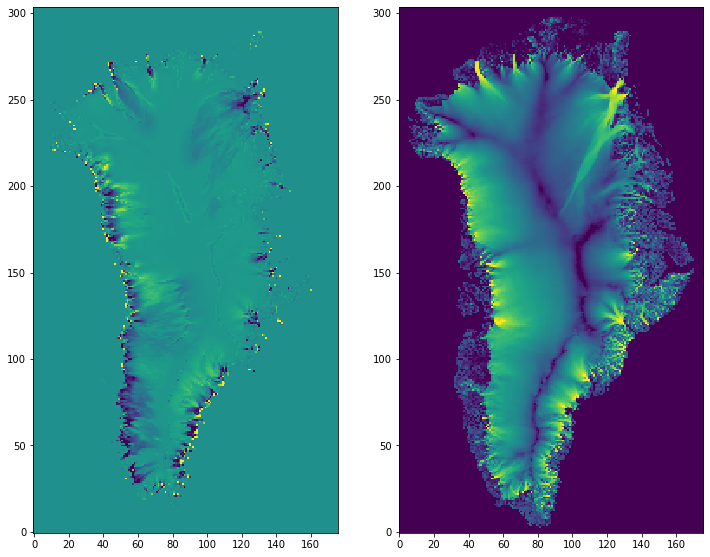

In [99]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(12,24)
model_index = 8
X_posterior = np.load(open('./samples/X_posterior_model_{0:03d}.npy'.format(model_index),'rb'))
axs[0].imshow((m(torch.tensor(X_posterior[1000],device=device),add_mean=True) - m(torch.tensor(X_posterior[0],device=device),add_mean=True)).detach().cpu().numpy().reshape((ny,nx)),origin='lower',vmin=-0.1,vmax=0.1)
axs[1].imshow(np.log10(U_obs.detach().cpu().numpy().reshape((ny,nx))+1e-3),origin='lower',vmin=0,vmax=3)

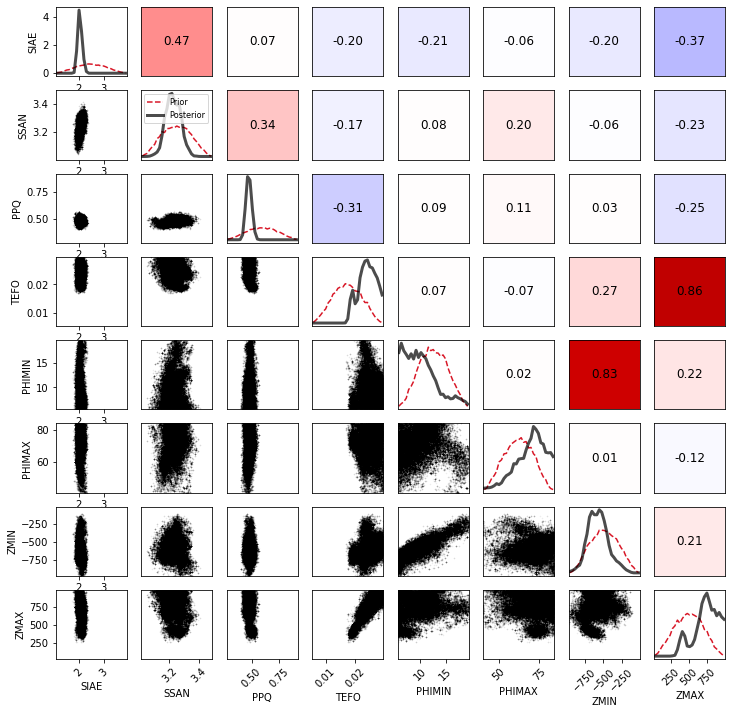

In [101]:
from matplotlib.ticker import NullFormatter,ScalarFormatter
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

#X_posterior = X_posterior*X_s.cpu().numpy() + X_m.cpu().numpy()
X_prior = X_prior*X_s.cpu().numpy() + X_m.cpu().numpy()

X_hat = X_prior

fig,axs = plt.subplots(nrows=8,ncols=8,figsize=(12,12))
X_list = []

for model_index in range(n_models):
    X_list.append(np.load(open('./samples/X_posterior_model_{0:03d}.npy'.format(model_index),'rb')))
    
X_posterior = np.vstack(X_list)    
X_posterior = X_posterior*X_s.cpu().numpy() + X_m.cpu().numpy()

C_0 = np.corrcoef((X_posterior - X_posterior.mean(axis=0)).T)
Cn_0 = (np.sign(C_0)*C_0**2 + 1)/2.

color_post_0 = '#00B25F'
color_post_1 = '#132DD6'
color_prior = '#D81727'
color_ensemble = '#BA9B00'
color_other = '#20484E0'


for i in range(8):
    for j in range(8):
        if i>j:
            
            axs[i,j].scatter(X_posterior[:,j],X_posterior[:,i],c='k',s=0.5,alpha=0.05,label='Posterior',rasterized=True)
            min_val = min(X_hat[:,i].min(),X_posterior[:,i].min())
            max_val = max(X_hat[:,i].max(),X_posterior[:,i].max())
            bins_y = np.linspace(min_val,max_val,30)

            min_val = min(X_hat[:,j].min(),X_posterior[:,j].min())
            max_val = max(X_hat[:,j].max(),X_posterior[:,j].max())
            bins_x = np.linspace(min_val,max_val,30)
            
            #v = st.gaussian_kde(X_posterior[:,[j,i]].T)
            #bx = 0.5*(bins_x[1:] + bins_x[:-1])
            #by = 0.5*(bins_y[1:] + bins_y[:-1])
            #Bx,By = np.meshgrid(bx,by)
            
            #axs[i,j].contour(10**Bx,10**By,v(np.vstack((Bx.ravel(),By.ravel()))).reshape(Bx.shape),7,alpha=0.7,colors='black')

            axs[i,j].set_xlim(X_hat[:,j].min(),X_hat[:,j].max())
            axs[i,j].set_ylim(X_hat[:,i].min(),X_hat[:,i].max())

            #axs[i,j].set_xscale('log')
            #axs[i,j].set_yscale('log')

        elif i<j:
            patch_upper = Polygon(np.array([[0.,0.],[0.,1.],[1.,1.],[1.,0.]]),facecolor=plt.cm.seismic(Cn_0[i,j]))
            #patch_lower = Polygon(np.array([[0.,0.],[1.,0.],[1.,1.]]),facecolor=plt.cm.seismic(Cn_1[i,j]))
            axs[i,j].add_patch(patch_upper)
            #axs[i,j].add_patch(patch_lower)
            if C_0[i,j]>-0.5:
                color = 'black'
            else:
                color = 'white'
            axs[i,j].text(0.5,0.5,'{0:.2f}'.format(C_0[i,j]),fontsize=12,horizontalalignment='center',verticalalignment='center',transform=axs[i,j].transAxes,color=color)
            #if C_1[i,j]>-0.5:
            #    color = 'black'
            #else:
            #    color = 'white'

            #axs[i,j].text(0.75,0.25,'{0:.2f}'.format(C_1[i,j]),fontsize=12,horizontalalignment='center',verticalalignment='center',transform=axs[i,j].transAxes,color=color)

        elif i==j:
            min_val = min(X_hat[:,i].min(),X_posterior[:,i].min())
            max_val = max(X_hat[:,i].max(),X_posterior[:,i].max())
            bins = np.linspace(min_val,max_val,30)
            #X_hat_hist,b = np.histogram(X_hat[:,i],bins,density=True)
            X_prior_hist,b = np.histogram(X_prior[:,i],bins,density=True)
            X_posterior_hist = np.histogram(X_posterior[:,i],bins,density=True)[0]
            b = 0.5*(b[1:] + b[:-1])
            lw = 3.0
            axs[i,j].plot(b,X_prior_hist,color=color_prior,linewidth=0.5*lw,label='Prior',linestyle='dashed')
            
            axs[i,j].plot(b,X_posterior_hist,color='black',linewidth=lw,linestyle='solid',label='Posterior',alpha=0.7)

            #for X_ind in X_stack:
            #    X_hist,_ = np.histogram(X_ind[:,i],bins,density=False)
            #    X_hist=X_hist/len(X_posterior)
            #    X_hist=X_hist/(bins[1]-bins[0])
            #    axs[i,j].plot(10**b,X_hist,'b-',alpha=0.2,lw=0.5)

            if i==1:
                axs[i,j].legend(fontsize=8)
            axs[i,j].set_xlim(min_val,max_val)
            #axs[i,j].set_xscale('log')

        else:
            axs[i,j].remove()

keys=samples.keys()

for i,ax in enumerate(axs[:,0]):
    ax.set_ylabel(keys[i])

for j,ax in enumerate(axs[-1,:]):
    ax.set_xlabel(keys[j])
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)
    if j>0:
        ax.tick_params(axis='y',which='both',length=0)
        ax.yaxis.set_minor_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())

for ax in axs[:-1,1:].ravel():
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_minor_formatter(NullFormatter())
    ax.tick_params(axis='both',which='both',length=0)

#fig.savefig('speed_emulator_posterior.pdf')

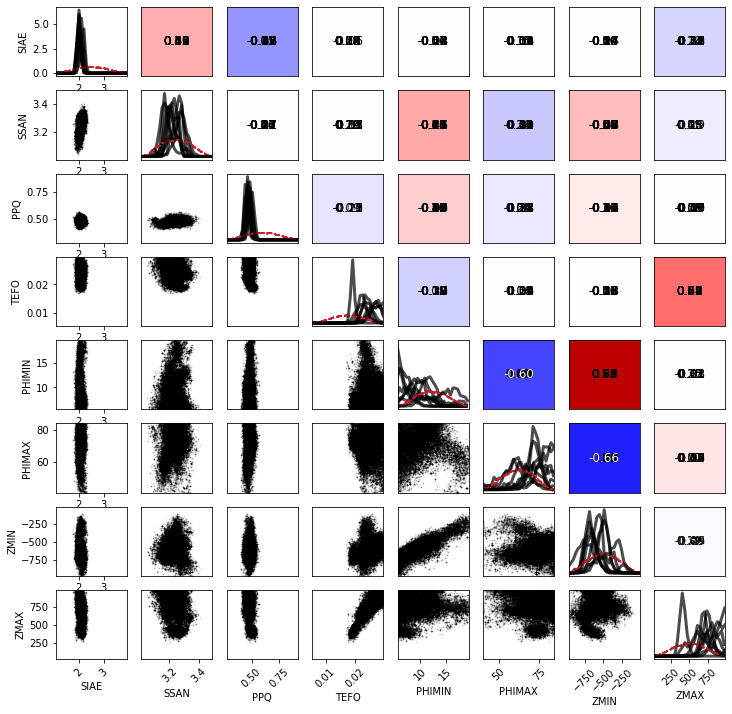

In [110]:
from matplotlib.ticker import NullFormatter,ScalarFormatter
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

#X_posterior = X_posterior*X_s.cpu().numpy() + X_m.cpu().numpy()
#X_prior = X_prior*X_s.cpu().numpy() + X_m.cpu().numpy()

X_hat = X_prior

fig,axs = plt.subplots(nrows=8,ncols=8,figsize=(12,12))
color_post_0 = '#00B25F'
color_post_1 = '#132DD6'
color_prior = '#D81727'
color_ensemble = '#BA9B00'
color_other = '#20484E0'


for model_index in range(9):
    X_posterior = np.load(open('./samples/X_posterior_model_{0:03d}.npy'.format(model_index),'rb'))
    X_posterior = X_posterior*X_s.cpu().numpy() + X_m.cpu().numpy()
    
    
    C_0 = np.corrcoef((X_posterior - X_posterior.mean(axis=0)).T)
    Cn_0 = (np.sign(C_0)*C_0**2 + 1)/2.

    for i in range(8):
        for j in range(8):
            if i>j:
            
                axs[i,j].scatter(X_posterior[:,j],X_posterior[:,i],c='k',s=0.5,alpha=0.05,label='Posterior',rasterized=True)
                min_val = min(X_hat[:,i].min(),X_posterior[:,i].min())
                max_val = max(X_hat[:,i].max(),X_posterior[:,i].max())
                bins_y = np.linspace(min_val,max_val,30)

                min_val = min(X_hat[:,j].min(),X_posterior[:,j].min())
                max_val = max(X_hat[:,j].max(),X_posterior[:,j].max())
                bins_x = np.linspace(min_val,max_val,30)

                axs[i,j].set_xlim(X_hat[:,j].min(),X_hat[:,j].max())
                axs[i,j].set_ylim(X_hat[:,i].min(),X_hat[:,i].max())

            elif i<j:
                patch_upper = Polygon(np.array([[0.,0.],[0.,1.],[1.,1.],[1.,0.]]),facecolor=plt.cm.seismic(Cn_0[i,j]))
             
                axs[i,j].add_patch(patch_upper)
            
                if C_0[i,j]>-0.5:
                    color = 'black'
                else:
                    color = 'white'
                axs[i,j].text(0.5,0.5,'{0:.2f}'.format(C_0[i,j]),fontsize=12,horizontalalignment='center',verticalalignment='center',transform=axs[i,j].transAxes,color=color)

            elif i==j:
                min_val = min(X_hat[:,i].min(),X_posterior[:,i].min())
                max_val = max(X_hat[:,i].max(),X_posterior[:,i].max())
                bins = np.linspace(min_val,max_val,30)
                #X_hat_hist,b = np.histogram(X_hat[:,i],bins,density=True)
                X_prior_hist,b = np.histogram(X_prior[:,i],bins,density=True)
                X_posterior_hist = np.histogram(X_posterior[:,i],bins,density=True)[0]
                b = 0.5*(b[1:] + b[:-1])
                lw = 3.0
                axs[i,j].plot(b,X_prior_hist,color=color_prior,linewidth=0.5*lw,label='Prior',linestyle='dashed')
            
                axs[i,j].plot(b,X_posterior_hist,color='black',linewidth=lw,linestyle='solid',label='Posterior',alpha=0.7)

                #if i==1:
                #    axs[i,j].legend(fontsize=8)
                axs[i,j].set_xlim(min_val,max_val)
            else:
                axs[i,j].remove()

keys=samples.keys()

for i,ax in enumerate(axs[:,0]):
    ax.set_ylabel(keys[i])

for j,ax in enumerate(axs[-1,:]):
    ax.set_xlabel(keys[j])
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)
    if j>0:
        ax.tick_params(axis='y',which='both',length=0)
        ax.yaxis.set_minor_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())

for ax in axs[:-1,1:].ravel():
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_minor_formatter(NullFormatter())
    ax.tick_params(axis='both',which='both',length=0)


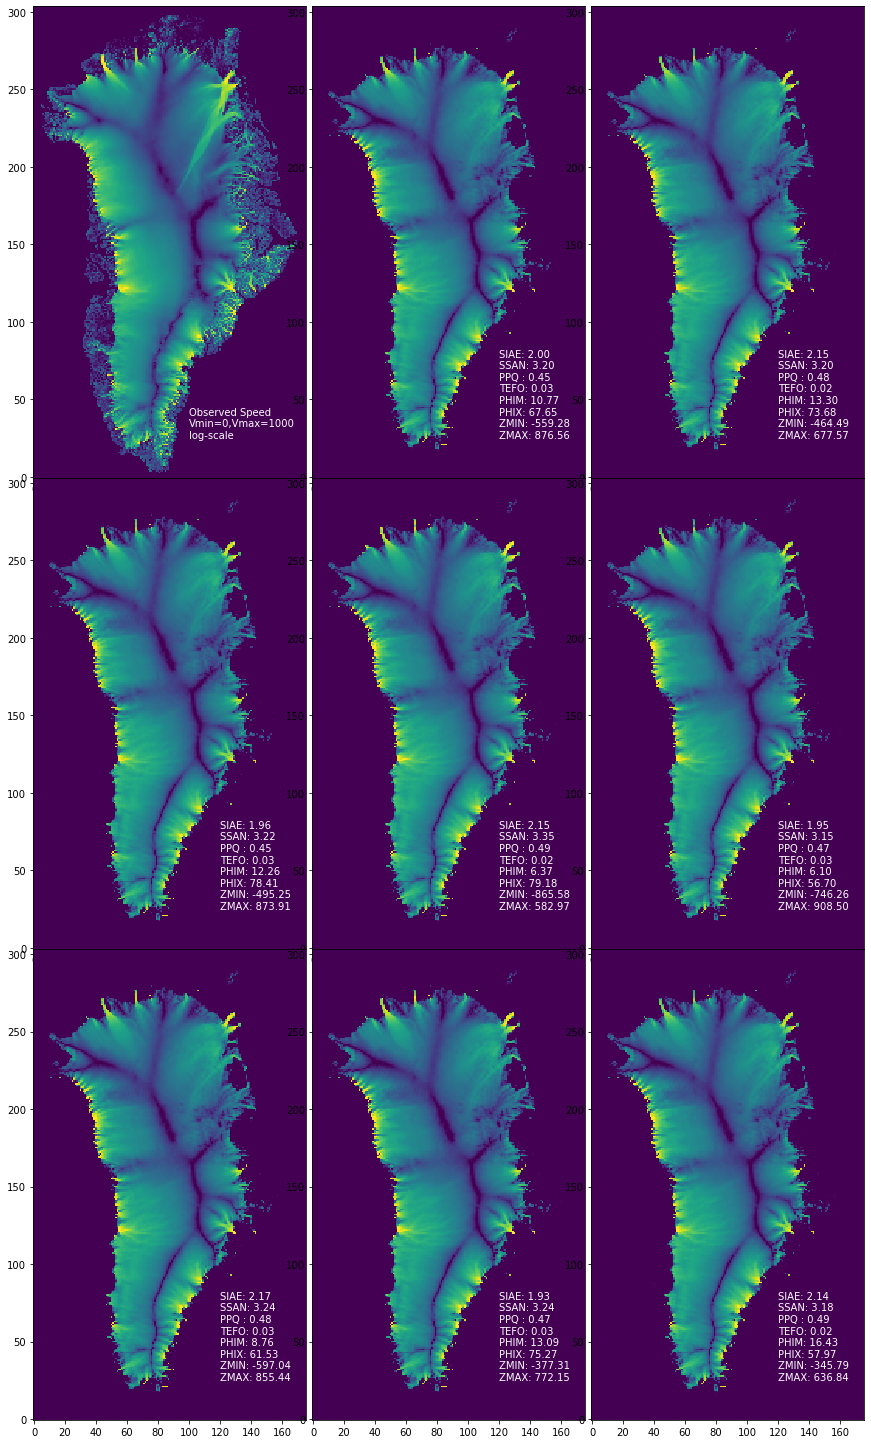

In [139]:
X_list = []

for model_index in range(n_models):
    X_list.append(np.load(open('./samples/X_posterior_model_{0:03d}.npy'.format(model_index),'rb')))
    
X_posterior = np.vstack(X_list)    
X_posterior = X_posterior*X_s.cpu().numpy() + X_m.cpu().numpy()

fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(15,26))
axs = axs.ravel()
axs[0].imshow(np.log10(U_obs.detach().cpu().numpy().reshape((ny,nx))+1e-3),origin='lower',vmin=0,vmax=3)
axs[0].text(100,25,'Observed Speed\nVmin=0,Vmax=1000\nlog-scale',c='white')
for ax in axs[1:]:
    model_index = np.random.randint(10)
    sample_index = np.random.randint(9000)
    m = models[model_index]
    
    X_p = np.load(open('./samples/X_posterior_model_{0:03d}.npy'.format(model_index),'rb'))
    X_p_scaled = X_p*X_s.cpu().numpy() + X_m.cpu().numpy()   
    ax.imshow(m(torch.tensor(X_p[sample_index],device=device),add_mean=True).detach().cpu().numpy().reshape((ny,nx)),origin='lower',vmin=0,vmax=3)
    ax.text(120,25,'SIAE: {0:.2f}\nSSAN: {1:.2f}\nPPQ : {2:.2f}\nTEFO: {3:.2f}\nPHIM: {4:.2f}\nPHIX: {5:.2f}\nZMIN: {6:.2f}\nZMAX: {7:.2f}'.format(*X_p_scaled[sample_index]),c='white')
fig.subplots_adjust(wspace=0,hspace=0)
fig.savefig('emulator_speeds.pdf')

In [6]:
from scipy.stats import dirichlet

TODO: Add plotting

In [8]:
X.shape

(996, 8)

In [9]:
F.shape

(996, 53504)

In [207]:
class GlacierDataModule(pl.LightningDataModule):
    def __init__(self, X, F, omegas, batch_size: int = 128):
        super().__init__()
        self.X = X
        self.F = F
        self.omegas = omegas
        self.batch_size = batch_size

    def setup(self):
        print(self.X.shape, self.F_mean.shape, self.omegas.shape)
        training_data = TensorDataset(self.X, self.F_mean, self.omegas)
        train_loader = DataLoader(dataset=training_data, batch_size=self.batch_size, shuffle=True)
        self.train_loader = train_loader

    def prepare_data(self):
        V_hat, F_bar, F_mean = self.get_eigenglaciers()
        n_eigenglaciers = V_hat.shape[1]
        self.V_hat = V_hat
        self.F_bar = F_bar
        self.F_mean = F_mean
        self.n_eigenglaciers = n_eigenglaciers

    def get_eigenglaciers(self, cutoff=0.999):
        print("Eigen")
        F = self.F
        omegas = self.omegas
        F_mean = (F * omegas).sum(axis=0)
        F_bar = F - F_mean  # Eq. 28
        Z = torch.diag(torch.sqrt(omegas.squeeze() * n_grid_points))
        U, S, V = torch.svd_lowrank(Z @ F_bar, q=100)
        lamda = S ** 2 / (n_samples)

        cutoff_index = torch.sum(torch.cumsum(lamda / lamda.sum(), 0) < cutoff)
        lamda_truncated = lamda.detach()[:cutoff_index]
        V = V.detach()[:, :cutoff_index]
        V_hat = V @ torch.diag(torch.sqrt(lamda_truncated))

        return V_hat, F_bar, F_mean

    def train_dataloader(self):
        return self.train_loader

    def val_dataloader(self):
        return DataLoader(self.mnist_val, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.mnist_test, batch_size=self.batch_size)


In [221]:
    for model_index in range(n_models):
        omegas = torch.tensor(dirichlet.rvs(np.ones(n_samples)), dtype=torch.float).T
        omegas_0 = torch.ones_like(omegas) / len(omegas)

        train_loader = GlacierDataModule(X_train, F, omegas)
        train_loader.prepare_data()
        train_loader.setup(stage="fit")
        n_eigenglaciers = train_loader.n_eigenglaciers
        e = GlacierEmulator(
            n_parameters, n_eigenglaciers, normed_area, n_hidden_1, n_hidden_2, n_hidden_3, n_hidden_4, V_hat, F_mean
        )

        lr_monitor = LearningRateMonitor(logging_interval="step")
        trainer = pl.Trainer(max_epochs=n_epochs, callbacks=[lr_monitor])
        trainer.fit(e, train_loader)

        F_train_pred = e(X_train)
        # Make a prediction based on the model
        loss_train = criterion_ae(F_train_pred, F_train, omegas, normed_area)
        # Make a prediction based on the model
        loss_test = criterion_ae(F_train_pred, F_train, omegas_0, normed_area)

        torch.save(e.state_dict(), "emulator_ensemble/emulator_pl2_{0:03d}.h5".format(model_index))


AssertionError: Size mismatch between tensors

In [217]:
class GlacierDataModule(pl.LightningDataModule):
    def __init__(self, X, F, omegas, batch_size: int = 128):
        super().__init__()
        self.X = X
        self.F = F
        self.omegas = omegas
        self.batch_size = batch_size

    def setup(self, stage):

        if stage == "fit" or stage is None:
            training_data = TensorDataset(self.X, self.F_mean, self.omegas)
            train_loader = DataLoader(dataset=training_data, batch_size=self.batch_size, shuffle=True)
            self.train_loader = train_loader
            self.dims = self.train_loader[0][0].shape

    def prepare_data(self):
        V_hat, F_bar, F_mean = self.get_eigenglaciers()
        n_eigenglaciers = V_hat.shape[1]
        self.V_hat = V_hat
        self.F_bar = F_bar
        self.F_mean = F_mean
        self.n_eigenglaciers = n_eigenglaciers

    def get_eigenglaciers(self, cutoff=0.999):
        F = self.F
        omegas = self.omegas
        F_mean = (F * omegas).sum(axis=0)
        F_bar = F - F_mean  # Eq. 28
        Z = torch.diag(torch.sqrt(omegas.squeeze() * n_grid_points))
        U, S, V = torch.svd_lowrank(Z @ F_bar, q=100)
        lamda = S ** 2 / (n_samples)

        cutoff_index = torch.sum(torch.cumsum(lamda / lamda.sum(), 0) < cutoff)
        lamda_truncated = lamda.detach()[:cutoff_index]
        V = V.detach()[:, :cutoff_index]
        V_hat = V @ torch.diag(torch.sqrt(lamda_truncated))

        return V_hat, F_bar, F_mean

    def train_dataloader(self):
        return self.train_loader

    def val_dataloader(self):
        return DataLoader(self.mnist_val, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.mnist_test, batch_size=self.batch_size)



In [23]:
run pl_train_emulator.py --emulator_dir test_emulator --num_models 1 --thinning_factor 10

2it [00:00, 19.99it/s]

The following simulations are missing:
   [337, 595, 539, 542]
  ... adjusting priors
  Loading data sets...


996it [00:41, 23.74it/s]
/Users/andy/base/pism-emulator/speedemulator/pl_train_emulator.py:229: RuntimeWarning: divide by zero encountered in log10
  response = np.log10(response)


Training model 0 of 1


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

   | Name      | Type      | Params
-----------------------------------------
0  | l_1       | Linear    | 1.2 K 
1  | norm_1    | LayerNorm | 256   
2  | dropout_1 | Dropout   | 0     
3  | l_2       | Linear    | 16.5 K
4  | norm_2    | LayerNorm | 256   
5  | dropout_2 | Dropout   | 0     
6  | l_3       | Linear    | 16.5 K
7  | norm_3    | LayerNorm | 256   
8  | dropout_3 | Dropout   | 0     
9  | l_4       | Linear    | 16.5 K
10 | norm_4    | LayerNorm | 256   
11 | dropout_4 | Dropout   | 0     
12 | l_5       | Linear    | 516   
-----------------------------------------
52.2 K    Trainable params
66.9 K    Non-trainable params
119 K     Total params
0.476     Total estimated model params size (MB)
/Users/andy/Library/Python/3.8/lib/python/site-packages/pytorch_lightning/utilities/distributed.py:51: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Con

Training: 0it [00:00, ?it/s]

TypeError: __init__() missing 1 required positional argument: 'hparams'